In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.cm as cm

from instances.parser import *

from math import atan, cos, sin, pi

from E3PNT.e3pnt import *
from E3PNT.poly_function import *
from E2PNT.TwoPointEllipse import *

import time
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [56]:
#lwell = 3
#psize = 30

def plot_all(X, Y, a, b, sol, used, wel, wpnt, lw=3, s=30):


    def fig_ax(w=4, h=4):
        fig,ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(w, h))
        ax.axis('off')
        return fig, ax


    def plt_points(ax, X, Y, a, b, sol, used, wel, wpnt):
        n=len(X)
        m=len(a)

        ans = 0

        for j in range(m):
            if used[j]:
                ans -= wel[j]

        for i in range(n):
            covered = False
            x, y = X[i], Y[i]


            j = 0
            for jj in range(m):
                if not used[jj]:
                    continue

                xc, yc, theta = sol[j]

                if eval_ellipse(theta, a[jj], b[jj], xc, yc, x, y) - 1e-9 < 1:
                    covered = True
                j+=1

            if covered:
                ans += wpnt[i]

            if covered:
                ax.scatter(x, y, zorder=10, color='black', s = s, marker='o')
            else:
                ax.scatter(x, y, zorder=10, color='gray', s = s, marker='o')

        ax.scatter([], [], zorder=100, color='black', s=50, marker='s', label='Covered')
        ax.scatter([], [], zorder=100, color='black', s=50, marker='o', label='Uncovered')

        print("Ans: " + str(ans))


    def ell_curve(a, b, xc, yc, theta):
        t = np.linspace(0, 2*pi, 1000)
        a+=1e-7
        b+=1e-7
        X = a * np.cos(t)
        Y = b * np.sin(t)

        XX = X * np.cos(-theta) + Y * np.sin(-theta)
        YY = Y * np.cos(-theta) - X * np.sin(-theta)
        XX += xc
        YY += yc

        return XX, YY

    def plt_sols(ax, a, b, sol, used):
        m=len(a)
        j = 0

        for i in range(m):

            if not used[i]:
                continue

            xc, yc, theta = sol[j]

            #E=mp.patches.Ellipse([xc, yc], a[i] * 2, b[i] * 2, fill=False, angle=theta/pi * 180, color=colors[3], lw=2, alpha=1)
            #ax.add_patch(E)
            ax.plot(*ell_curve(a[i], b[i], xc, yc, theta), lw=lw, color=colors[i])
            j+=1

        
    fig, ax = fig_ax()
    plt_points(ax, X, Y, a, b, sol, used, wel, wpnt)        
    plt_sols(ax, a, b, sol, used)
    return fig, ax

<IPython.core.display.Javascript object>


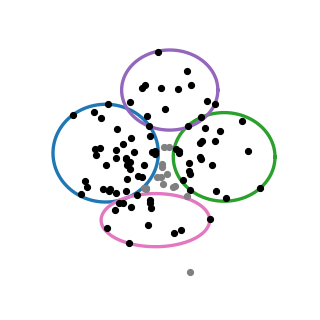

Ans: 148.75269402034522


In [57]:
a = [1.39035893815005940, 1.33007846309731881, 1.34320850228312683, 0.75793130954262988, 1.27028966413291422, 0.96234352072005169, 1.43302457812767692]
b = [1.29078259753390689, 0.55620126756943156, 1.16993450200277072, 0.57750336414995529, 1.05769169691598286, 0.75530877315647060, 0.70160012807637240]
wel = [17.94651121689818041, 7.39791327141530086, 15.71465970204497609, 4.37707881055449910, 13.43574830431576039, 7.26866503990140700, 10.05410227550967583]
X = [-0.97270468795063880, 1.19399951669401094, -0.30692467630572001, -0.21903437296545991, -0.29596915577802635, -1.57996299464969714, 1.56827836462543191, 0.89116291547622473, -0.38071710661578234, -1.06977259938047076, -0.67203786433508272, -0.15740115101285090, 1.28332741389046401, -0.88171742618983862, 2.42620303209002275, -0.67318816944564586, 2.26112108175621929, -1.40714750625614582, -0.80456267707630802, -1.23885357265784957, 1.21016625040904691, 2.74154725758033990, -0.03294317340294347, -0.77186747904368969, -0.12677503798367784, -0.57956256493587144, -0.03883366136511971, 0.15704437503143970, 0.60920665753039505, 1.58181378560574726, 0.83962001645490247, -1.44314430250107972, 0.27565760145711321, 0.71337919602591582, 0.48631369968500493, 0.16433293962359197, -0.70927788735594033, 0.51776962071636656, 1.55073401749746909, 0.66007732470813174, -1.02217299629075553, 0.58563558092248835, 0.91855014881512731, -1.21467090837424485, 0.88379390837981886, -1.04913622490862313, -1.60701129347764926, 0.61621300807915513, -0.31137390631920325, -2.19292612514013152, 1.17398159284551507, 0.02582446578365770, -1.88334283821877779, 0.85950608404110318, -0.23016210916135127, 1.41209121969729345, -0.36735010016618225, 1.46711309815166158, 0.89133576565392003, -1.33484535244622826, 1.14857321002937529, -1.64820504483762509, -0.78107895933841009, -0.69735868640126775, -0.86658378368032862, 0.86625018285592559, 1.69533049200061958, -0.49424723627410116, 0.43869551657848477, -0.25385837476418810, -1.08691176855728644, 0.17344245177501530, 0.20532801580221921, 1.85509537224198451, 0.13370818672107185, -0.68683830985821259, -0.78451894538071210, -0.16321696683919310, -1.83422095855990031, 0.82875465258709347, 1.15279249572843234, -0.09578228980705653, -0.46625570482543566, 0.81106659814402804, -1.27736690166262590, -1.46758956340259816, -0.27344072413940923, -0.67719956767182887, -0.17443389528733150, -1.05632108705163397, -0.15114943971196207, -1.30047354601872778, -1.99029387769083721, 1.33651141695109366, -0.75482532906884225, 0.14079358663226105, 0.04655116265839825, 0.35133183319025496, 0.24534831120451589, 0.50260800007769513]
Y = [-1.09211553061076772, 0.06232763175310298, -0.70246832051219577, -1.68839555612779812, 2.01840591734794739, 0.17888814076251000, 0.54592176147842053, -0.74084280692063353, 1.92957244085713819, 0.10134927118732824, 0.61522112267198825, -1.08520551205143567, 0.88052290520399079, 0.47296749077644701, 0.28910533320213955, -1.18822310999734015, 1.05983813713896224, -0.71220149233607977, 0.07112356545413132, -0.76949398052702234, 0.55120116976418410, -0.70919836599390496, 0.19658312116536725, -0.44865163270097164, -1.21874433364869028, 0.24971215954487558, 0.28939483809711775, -0.06328882968987251, 0.22863881706562467, -0.78932733502056629, 0.94691133822246298, 1.14905530674115086, -0.32172528176056447, -0.50004866061995379, -1.89202878481142012, -0.15595241306479660, -2.16164528011157442, 0.33752360364345735, 1.51816159453280397, -1.79912550207250654, 0.86897638410975886, 1.92378273895935870, 2.02188935563042405, -0.72333764624727614, -0.32569378487741396, -0.82792603301974421, 0.31999829307525329, 0.28722532819036445, -0.08341774438634575, 1.23540060431804410, 1.16368647023396821, -0.39916556992408880, -0.51815696313770432, -0.24249487578069576, 1.21362407449958831, -1.50460515194053968, -0.41222210305460683, -0.08687127077184684, -2.91686786864892422, -0.08607954190472263, 0.10970033681756523, 1.31900614747863676, 0.09993546808822205, -0.20542981041247740, -1.09033973878509083, -0.04143648756159958, 0.81499778019509883, -0.89198234367257112, -0.66324859593275576, -0.70148276076191074, -1.28928002910815165, -0.59880776466588870, 0.37666754142940084, -0.96009181410515321, -0.40749594358562369, 1.57185848672947603, -0.78768443028406887, -1.01315576347307235, -0.65930328938196670, 2.39818083325331566, 0.50173737928040640, 0.25122059959122461, -0.39270776722072098, -0.91064633457131017, 1.51193069786744405, 0.35749122437942010, -0.72915796130981914, -0.01533422782813133, 0.92879155069400543, 0.30112380148297568, 0.66450733776899551, -1.74905448687153320, -0.86022597162428249, 1.60070659938577275, -0.08865035419601738, 1.94120966696700248, 2.90321322908287049, 0.38443388331723366, 1.39645949746424591, -0.65553398832490106]
wpnt = [2.13887074216238826, 1.42951957954548203, 0.58766449824859601, 2.89865561049246878, 4.16156018835716601, 2.52828403136790669, 2.75752759860792063, 1.34301940648612783, 3.86819531978526676, 1.15468508915545165, 0.83013192088184073, 1.20244612572698895, 2.42224983783166259, 1.00112386697820210, 5.97004304660874041, 1.86505647061333080, 6.23592542329660127, 2.48729507004862915, 0.65237966290710359, 2.12687916055443926, 1.76832508317849690, 8.01904368787470823, 0.03973017620097386, 0.79706769273050826, 1.50140966105655305, 0.39824892929961159, 0.08525742557227778, 0.02866841169252917, 0.42340846024852424, 3.12517249414305454, 1.60160285448598638, 3.40299357579132788, 0.17949427016500324, 0.75895854031039178, 3.81627393705629636, 0.05132647018606407, 5.17578543852075335, 0.38200756315323581, 4.70959062013822649, 3.67255464680149313, 1.79995759048649195, 4.04390906036039244, 4.93177094229990409, 1.99864276612926273, 0.88716811399705087, 1.78614833456732747, 2.68488420493578284, 0.46221686048002347, 0.10391222961498567, 6.33513964347149994, 2.73239898134568460, 0.16000005524583394, 3.81546688471804973, 0.79755447328356699, 1.52585799069858408, 4.25783827599220466, 0.30487315833886697, 2.15996746045368271, 9.30259761029037691, 1.78922180248182228, 1.33125458269507080, 4.45635708691463250, 0.62007143850318569, 0.52851054450540813, 1.93980820011165456, 0.75210636179936707, 3.53836685883000124, 1.03991283198819984, 0.63235245627283554, 0.55652213808406703, 2.84362018608544442, 0.38865302310188682, 0.18403803083974579, 4.36315513162535140, 0.18393082323497481, 2.94248596619236480, 1.23591673737320296, 1.05312437932289038, 3.79904735221028078, 6.43810558316832182, 1.58067093597495800, 0.07228603669965737, 0.37161377271774776, 1.48710577329308880, 3.91760063661711300, 2.28161910211652552, 0.60644116215937616, 0.45883439299799700, 0.89308092846568699, 1.20648978276950425, 0.46441615507407796, 4.75042304193996667, 4.70125844183057051, 4.34852438495778504, 0.57762016270296535, 3.78811780516291696, 8.43081406426663627, 0.27122346765519356, 2.01029492186900205, 0.68233961159125189]

used=[1, 0, 1, 0, 1, 0, 1]
sol=[(-1.33161200620061182, 0.22213087896268946, 0.00000000000000000), (1.79724271422933901, 0.12282223492124567, 0.00000000000000000), (0.36066103595064902, 1.88806492518787894, 0.00000000000000000), (-0.01831610914443826, -1.54698915726066821, 0.00000000000000000)]

fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt)    
fig.savefig('MCE_TA04.pdf', bbox_inches="tight")


<IPython.core.display.Javascript object>


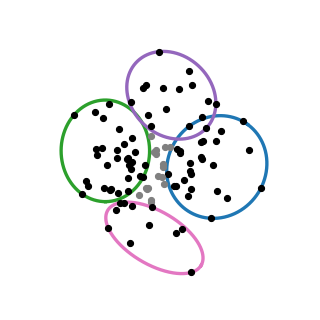

Ans: 157.07941061137274


In [37]:
a = [1.39035893815005940, 1.33007846309731881, 1.34320850228312683, 0.75793130954262988, 1.27028966413291422, 0.96234352072005169, 1.43302457812767692]
b = [1.29078259753390689, 0.55620126756943156, 1.16993450200277072, 0.57750336414995529, 1.05769169691598286, 0.75530877315647060, 0.70160012807637240]
wel = [17.94651121689818041, 7.39791327141530086, 15.71465970204497609, 4.37707881055449910, 13.43574830431576039, 7.26866503990140700, 10.05410227550967583]
X = [-0.97270468795063880, 1.19399951669401094, -0.30692467630572001, -0.21903437296545991, -0.29596915577802635, -1.57996299464969714, 1.56827836462543191, 0.89116291547622473, -0.38071710661578234, -1.06977259938047076, -0.67203786433508272, -0.15740115101285090, 1.28332741389046401, -0.88171742618983862, 2.42620303209002275, -0.67318816944564586, 2.26112108175621929, -1.40714750625614582, -0.80456267707630802, -1.23885357265784957, 1.21016625040904691, 2.74154725758033990, -0.03294317340294347, -0.77186747904368969, -0.12677503798367784, -0.57956256493587144, -0.03883366136511971, 0.15704437503143970, 0.60920665753039505, 1.58181378560574726, 0.83962001645490247, -1.44314430250107972, 0.27565760145711321, 0.71337919602591582, 0.48631369968500493, 0.16433293962359197, -0.70927788735594033, 0.51776962071636656, 1.55073401749746909, 0.66007732470813174, -1.02217299629075553, 0.58563558092248835, 0.91855014881512731, -1.21467090837424485, 0.88379390837981886, -1.04913622490862313, -1.60701129347764926, 0.61621300807915513, -0.31137390631920325, -2.19292612514013152, 1.17398159284551507, 0.02582446578365770, -1.88334283821877779, 0.85950608404110318, -0.23016210916135127, 1.41209121969729345, -0.36735010016618225, 1.46711309815166158, 0.89133576565392003, -1.33484535244622826, 1.14857321002937529, -1.64820504483762509, -0.78107895933841009, -0.69735868640126775, -0.86658378368032862, 0.86625018285592559, 1.69533049200061958, -0.49424723627410116, 0.43869551657848477, -0.25385837476418810, -1.08691176855728644, 0.17344245177501530, 0.20532801580221921, 1.85509537224198451, 0.13370818672107185, -0.68683830985821259, -0.78451894538071210, -0.16321696683919310, -1.83422095855990031, 0.82875465258709347, 1.15279249572843234, -0.09578228980705653, -0.46625570482543566, 0.81106659814402804, -1.27736690166262590, -1.46758956340259816, -0.27344072413940923, -0.67719956767182887, -0.17443389528733150, -1.05632108705163397, -0.15114943971196207, -1.30047354601872778, -1.99029387769083721, 1.33651141695109366, -0.75482532906884225, 0.14079358663226105, 0.04655116265839825, 0.35133183319025496, 0.24534831120451589, 0.50260800007769513]
Y = [-1.09211553061076772, 0.06232763175310298, -0.70246832051219577, -1.68839555612779812, 2.01840591734794739, 0.17888814076251000, 0.54592176147842053, -0.74084280692063353, 1.92957244085713819, 0.10134927118732824, 0.61522112267198825, -1.08520551205143567, 0.88052290520399079, 0.47296749077644701, 0.28910533320213955, -1.18822310999734015, 1.05983813713896224, -0.71220149233607977, 0.07112356545413132, -0.76949398052702234, 0.55120116976418410, -0.70919836599390496, 0.19658312116536725, -0.44865163270097164, -1.21874433364869028, 0.24971215954487558, 0.28939483809711775, -0.06328882968987251, 0.22863881706562467, -0.78932733502056629, 0.94691133822246298, 1.14905530674115086, -0.32172528176056447, -0.50004866061995379, -1.89202878481142012, -0.15595241306479660, -2.16164528011157442, 0.33752360364345735, 1.51816159453280397, -1.79912550207250654, 0.86897638410975886, 1.92378273895935870, 2.02188935563042405, -0.72333764624727614, -0.32569378487741396, -0.82792603301974421, 0.31999829307525329, 0.28722532819036445, -0.08341774438634575, 1.23540060431804410, 1.16368647023396821, -0.39916556992408880, -0.51815696313770432, -0.24249487578069576, 1.21362407449958831, -1.50460515194053968, -0.41222210305460683, -0.08687127077184684, -2.91686786864892422, -0.08607954190472263, 0.10970033681756523, 1.31900614747863676, 0.09993546808822205, -0.20542981041247740, -1.09033973878509083, -0.04143648756159958, 0.81499778019509883, -0.89198234367257112, -0.66324859593275576, -0.70148276076191074, -1.28928002910815165, -0.59880776466588870, 0.37666754142940084, -0.96009181410515321, -0.40749594358562369, 1.57185848672947603, -0.78768443028406887, -1.01315576347307235, -0.65930328938196670, 2.39818083325331566, 0.50173737928040640, 0.25122059959122461, -0.39270776722072098, -0.91064633457131017, 1.51193069786744405, 0.35749122437942010, -0.72915796130981914, -0.01533422782813133, 0.92879155069400543, 0.30112380148297568, 0.66450733776899551, -1.74905448687153320, -0.86022597162428249, 1.60070659938577275, -0.08865035419601738, 1.94120966696700248, 2.90321322908287049, 0.38443388331723366, 1.39645949746424591, -0.65553398832490106]
wpnt = [2.13887074216238826, 1.42951957954548203, 0.58766449824859601, 2.89865561049246878, 4.16156018835716601, 2.52828403136790669, 2.75752759860792063, 1.34301940648612783, 3.86819531978526676, 1.15468508915545165, 0.83013192088184073, 1.20244612572698895, 2.42224983783166259, 1.00112386697820210, 5.97004304660874041, 1.86505647061333080, 6.23592542329660127, 2.48729507004862915, 0.65237966290710359, 2.12687916055443926, 1.76832508317849690, 8.01904368787470823, 0.03973017620097386, 0.79706769273050826, 1.50140966105655305, 0.39824892929961159, 0.08525742557227778, 0.02866841169252917, 0.42340846024852424, 3.12517249414305454, 1.60160285448598638, 3.40299357579132788, 0.17949427016500324, 0.75895854031039178, 3.81627393705629636, 0.05132647018606407, 5.17578543852075335, 0.38200756315323581, 4.70959062013822649, 3.67255464680149313, 1.79995759048649195, 4.04390906036039244, 4.93177094229990409, 1.99864276612926273, 0.88716811399705087, 1.78614833456732747, 2.68488420493578284, 0.46221686048002347, 0.10391222961498567, 6.33513964347149994, 2.73239898134568460, 0.16000005524583394, 3.81546688471804973, 0.79755447328356699, 1.52585799069858408, 4.25783827599220466, 0.30487315833886697, 2.15996746045368271, 9.30259761029037691, 1.78922180248182228, 1.33125458269507080, 4.45635708691463250, 0.62007143850318569, 0.52851054450540813, 1.93980820011165456, 0.75210636179936707, 3.53836685883000124, 1.03991283198819984, 0.63235245627283554, 0.55652213808406703, 2.84362018608544442, 0.38865302310188682, 0.18403803083974579, 4.36315513162535140, 0.18393082323497481, 2.94248596619236480, 1.23591673737320296, 1.05312437932289038, 3.79904735221028078, 6.43810558316832182, 1.58067093597495800, 0.07228603669965737, 0.37161377271774776, 1.48710577329308880, 3.91760063661711300, 2.28161910211652552, 0.60644116215937616, 0.45883439299799700, 0.89308092846568699, 1.20648978276950425, 0.46441615507407796, 4.75042304193996667, 4.70125844183057051, 4.34852438495778504, 0.57762016270296535, 3.78811780516291696, 8.43081406426663627, 0.27122346765519356, 2.01029492186900205, 0.68233961159125189]


used=[1, 0, 1, 0, 1, 0, 1]

sol=[(1.57601648167501684, -0.14871086233120279, 0.95416541796682497),
     (-1.37099160459741709, 0.27885084647414848, -1.56822239488423532), 
     (0.37342271994834852, 1.74889348136451828, -0.74418870943339266), 
     (-0.07346598350242384, -2.02216349658474570, -0.53140960776936208)]



fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt)    
fig.savefig('MCER_TA04.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


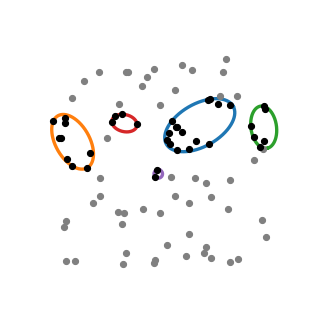

Ans: 26.5


In [38]:
### plot solution of AB108

a = [9.00000, 7.00000, 5.00000, 3.00000, 1.00000]
b = [5.00000, 4.00000, 3.00000, 2.00000, 1.00000]
wel = [4.50000, 2.80000, 1.50000, 0.60000, 0.10000]
X = [14.60000, 36.60000, 22.01000, 2.95000, 28.66000, 19.65000, 17.56000, 11.06000, 31.86000, 25.00000, 47.14000, 36.80000, 40.48000, 37.06000, 4.34000, 35.90000, 7.84000, 47.09000, 16.34000, 39.87000, 16.05000, 27.85000, 4.49000, 49.68000, 3.25000, 23.58000, 49.02000, 39.06000, 8.53000, 40.97000, 49.21000, 31.81000, 49.38000, 36.90000, 28.94000, 10.72000, 36.28000, 28.59000, 27.48000, 27.12000, 2.94000, 31.11000, 11.08000, 41.45000, 46.29000, 32.48000, 9.30000, 2.56000, 43.19000, 24.40000, 16.23000, 17.12000, 23.69000, 43.28000, 23.97000, 31.89000, 21.09000, 28.86000, 33.17000, 1.78000, 2.73000, 24.97000, 48.55000, 20.71000, 17.00000, 13.88000, 30.23000, 35.74000, 26.70000, 5.09000, 49.42000, 27.57000, 49.98000, 2.68000, 26.74000, 12.62000, 38.72000, 41.51000, 15.13000, 29.02000, 7.33000, 15.35000, 23.90000, 41.49000, 30.11000, 1.27000, 33.56000, 0.04000, 35.27000, 16.69000]
Y = [34.75000, 28.14000, 43.84000, 10.02000, 16.01000, 32.84000, 44.97000, 16.08000, 14.34000, 37.23000, 24.34000, 38.68000, 48.15000, 1.48000, 23.09000, 18.94000, 22.50000, 29.85000, 0.04000, 45.00000, 9.52000, 33.60000, 38.91000, 36.35000, 24.68000, 0.39000, 10.38000, 39.49000, 26.12000, 12.87000, 26.88000, 7.05000, 28.90000, 15.72000, 26.77000, 44.98000, 38.57000, 40.77000, 28.26000, 30.72000, 0.69000, 1.96000, 20.17000, 19.61000, 32.42000, 45.51000, 14.29000, 8.68000, 39.46000, 22.13000, 35.12000, 2.51000, 45.70000, 1.17000, 20.40000, 26.90000, 13.00000, 32.17000, 20.31000, 29.47000, 34.26000, 12.03000, 27.53000, 41.75000, 45.11000, 33.23000, 31.00000, 3.92000, 29.02000, 0.67000, 36.98000, 20.51000, 6.43000, 33.15000, 4.46000, 29.48000, 37.60000, 37.27000, 12.22000, 32.13000, 42.90000, 37.56000, 1.09000, 0.60000, 46.58000, 29.53000, 28.84000, 33.54000, 2.72000, 12.01000]
wpnt = [1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000, 1.00000]
used=[1, 1, 1, 1, 1]
sol=[(34.3499483692, 32.5724236410, 0.5162535105), (4.5574293649, 28.6776670445, -1.0577578597), (49.3328592095, 32.0900579499, -1.4284994059), (16.7019419891, 33.0571065292, -0.2289592622), (24.6249887410, 21.1556386366, 1.3271782070)]

fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt)    
fig.savefig('MCER_AB108.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


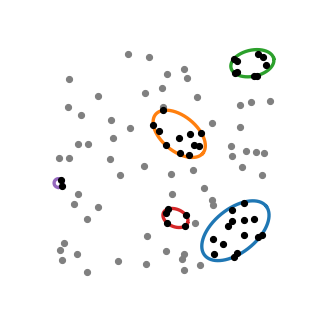

Ans: 31.5


In [42]:
### plot solution of AB120

n=100
m=5

a = [9, 7, 5, 3, 1]
b = [5, 4, 3, 2, 1]
X = [7.18, 41.49, 16.91, 33.17, 45.22, 14.17, 5.09, 40.11, 30.61, 29.58, 28.18, 40.25, 9.68, 45.27, 43.01, 6.96, 41.28, 46.09, 31.44, 40.23, 41.45, 29.21, 33.91, 25.52, 0.92, 25.24, 35.95, 40.83, 5.78, 40.59, 48.07, 48.98, 45.99, 47.54, 24.34, 4.09, 42.17, 12.32, 2.62, 40.6, 42.94, 32.64, 31.33, 24.53, 9.58, 35.9, 12.66, 47, 29.96, 36.09, 32.31, 20.08, 23.48, 0.55, 20.24, 29.64, 6.99, 42.08, 35.75, 25.43, 31.73, 2.97, 46.2, 3.04, 44.51, 30.45, 29.32, 1.28, 32.93, 28.9, 42.98, 16.36, 20.83, 38.29, 25.06, 1.91, 25.04, 1.17, 4.86, 47.41, 43.35, 26.18, 28.4, 25.46, 29.29, 14.51, 12.91, 22.25, 39.32, 40.32, 24.27, 21.16, 47.12, 20.56, 26.55, 1.34, 45.84, 42.55, 4.97, 35.56]
Y = [29.31, 45.9, 33, 32.04, 12.19, 2.55, 29.52, 28.98, 31.6, 10.72, 30.85, 11.73, 40.29, 44.95, 11.97, 0.19, 48.45, 8.19, 29.26, 26.66, 4.4, 46.54, 19.32, 14.52, 5.1, 29.1, 15.49, 45.63, 36.1, 48.79, 47.55, 39.35, 45.08, 27.44, 37.77, 15.79, 33.3, 26.08, 37.84, 3.54, 15.84, 28.89, 23.47, 37.11, 15.11, 7.65, 34.88, 8.65, 44.54, 4.29, 40.18, 24.47, 32.4, 26.1, 41.15, 13.19, 12.28, 38.32, 16.61, 45.33, 11.32, 44.39, 49.97, 26.16, 39.13, 26.81, 0.53, 2.8, 1.83, 3.18, 8.55, 49.98, 8.45, 6.58, 13.72, 6.79, 4.89, 21.25, 4.21, 49.36, 27.86, 22.66, 27.46, 11.33, 4.36, 22.28, 30.87, 33.74, 10.55, 14.38, 42.23, 49.31, 22.33, 1.98, 17.97, 19.89, 27.51, 24.23, 18.02, 34.27]
wel = [4.5, 2.8, 1.5, 0.6, 0.1]

used=[1, 1, 1, 1, 1]

sol=[(41.02186669525183760, 9.57446245604466029, 0.67378747187938348), (28.16416848489604163, 31.74583481339853819, -0.68663730281846869), (44.89973535451907338, 47.90005017522279473, 0.21283711769324115), (27.30187261701078683, 12.49044192731734171, -0.40298630276201730), (0.53235528465546356, 20.47966941058193058, -1.44644133224813509)]


fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt)    

fig.savefig('MCER_AB120.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


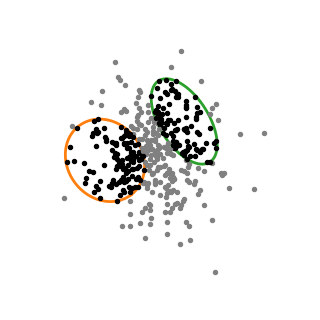

Ans: 364.71563899505145


In [59]:
### plot solution of TA21
a = [0.619457050491114, 1.289363560597643, 1.432620683584994]
b = [0.518289689312797, 1.118006594251441, 0.733710121677418]
wel = [3.210582022416606, 14.415169631356818, 10.511282960707309]
X = [0.924593211991389, 0.610783673907534, -2.444831691865275, -1.152019060470500, -0.471344599617448, -1.109860975467997, 0.118772591182743, 0.428644074528317, -0.153498708441545, -0.912096303550942, -1.171025008598642, -0.224168507070783, 0.806892967059119, -0.853676298924808, 0.593046753704389, 0.102177412724570, -1.018441406360389, -1.596908255828228, -0.715747124984822, -0.645794357960433, -0.748858573312859, -0.184964281644792, -0.712246724574040, -0.671450160192714, 0.643328682716395, 0.940078861944912, 0.008381155474625, -1.431707000802356, 0.946556014852333, -0.115964745379239, -0.788229215082176, -1.508588498648803, -1.561209558027567, 0.372587255555208, -0.126240413361533, -0.844208276934088, -1.155237192166839, 0.978353094899254, -1.074745430814391, -1.209359513137507, -1.497328112190474, 0.016249181062380, 0.991037450367789, 0.383821472820808, 1.171354085868293, 0.688125358885532, -1.623345812722472, -0.077542044444102, 1.354400577885340, 1.483463399539691, 0.175842528876414, -0.029821384346548, -0.965928157991324, 0.929876264344749, -2.112842128047219, 1.388089806412903, 0.191644596911567, -0.919034833902265, 0.309074408204641, -0.466365948024174, -1.101183756496267, 0.788752355146474, -1.359583693497664, 0.141532509701196, 0.123431511650918, 3.276242503892225, 1.068080045889507, -2.591699485554846, 0.468405549950093, -0.444747269707349, -0.028624189832738, -0.130982169745216, -0.633238071437988, -0.641696540938244, -0.292859474265015, -0.432641030773339, 0.533090893464981, 0.305163778351323, -0.448640303535381, 0.536603278271651, -0.136518843149273, 1.275784633406539, -0.084924238201235, 1.024364763664190, 1.706049339734031, 0.663252677531962, 1.444636613739196, 0.998792109294338, -1.742201501967590, -0.098352879906712, 0.047473163179924, 0.079933948933671, 0.553467841632758, 0.390371654804051, -0.756222390810148, 0.945680707595906, -1.271928206977094, -1.739035577556774, 1.849642916308514, 0.386774492508466, -0.392716059039612, -0.936880291308459, -0.178324802566761, 0.880920669068133, 0.476019900842781, 0.564254284260402, -0.292700421961589, 1.799668058340384, -0.733342294032012, 0.164658656083658, -0.492596411007165, 0.702110384013572, -0.131780029018660, 0.984671925552173, -1.680760478368911, -1.038318635655534, -0.827352866329884, 0.688394417943798, -1.681787099612549, -0.520513250034996, -0.578420726168698, 1.232120279956428, -0.540674285249635, 0.014907679766179, 1.220326459543091, -0.404826281010197, -0.700021540933966, 0.602543042349275, -1.106067068441452, 0.050817366803512, -0.933499988487367, -0.865439001473881, -0.193453326821977, -0.231648919406144, -0.371826300380045, 0.649129289263730, -1.829793856864947, -1.808352758609380, 1.562554993115480, 0.201963628298689, -1.119453478183790, 0.588481917503860, -1.610147517103908, -0.304260893488576, -0.628313923963501, 0.543615402779170, 1.341656192036815, -0.979843960626957, 0.711272007218413, 0.338433209637568, 1.546311381578034, 1.649020114366669, 0.459898015283806, 1.785043952782320, 0.067210556787318, 0.422973950879874, -0.486846696416950, 0.464615758513826, 0.381608656379679, 0.392103881004350, -0.794311449244544, -0.511442235827270, 0.953666619907335, -0.679888802946712, 0.469468111661002, -0.994658626199153, -0.921420597971140, 0.009085960250355, -0.623975216208310, 0.867936097862284, 2.086968769237320, 0.132589159638783, 1.255053478777326, -1.848149017439618, -0.251642935131265, 0.313852091933339, -0.415269783240555, 0.464681394337519, 0.947280541668667, 1.039605376758345, -0.774534695914781, 0.762351256493556, 0.890722962846609, -1.888586925534606, 0.024527894744454, 1.489206969910997, 0.493780479889672, -0.393913046609509, 1.250908902947651, -0.379106684790852, 0.098433583907241, 1.722819743171502, 0.652446586459656, -0.646703668922815, 0.365715432752175, -0.561723970370229, -1.725844590772461, 0.760646111934904, 1.719046046096730, 0.688887088947460, -2.505240352337524, 0.798363333641453, 0.937385853190147, -0.676217852174716, 0.512470879568397, -0.710086835916277, 0.885610081614749, 1.045374296934902, 1.299489267550764, 0.197948264494062, -0.224002873303605, 0.170971066220172, -0.137912541876295, 0.432975292917537, 0.485124804631593, 0.378437043208263, -0.455157199070664, -0.007647372154041, -0.836586865616926, 0.026289793298895, 0.065564522088961, 0.066129405131879, 0.882182071893570, -1.305401385970687, 0.122538908214686, -0.768836924781450, -1.723431685307639, 0.564860363342686, -0.089625938653601, 0.605117836167011, -1.134996378474744, 0.074099130577744, -0.480198214099746, 1.830643631429945, -1.260989562068661, 0.937113883776087, 0.256706771591978, -0.462362455951853, -0.892827893853935, -0.502500271649642, -1.484348943758260, 1.979500274608826, 0.294934251033323, -0.602743722765384, -0.695526828593557, 2.548489108434404, 0.141597480789080, 0.610310099144164, -0.648808595722042, -0.549633994334263, -0.864855197791703, -0.844971592415710, 0.651784249050896, 0.099578934174376, 1.022789439798989, -0.379360914529935, -0.724445782732324, 0.096795045478336, 0.257128028454236, 0.527616106734400, 1.842863726255596, -1.036911135042267, 0.583247813127824, 2.982287591461842, 0.171392008479283, -0.281586777729902, 0.358264265699888, -1.180825115392236, 0.914581231935016, 0.693600155307323, 0.509845997252714, -0.216021706561316, -0.489305494592965, -0.852566483020384, -0.783783968081673, 0.397773210804266, 0.566165533768168, -2.314761100271411, 0.504477171979853, 1.646129638381694, -1.447519443676212, 0.264964776159031, 2.007087498432483, 0.965034590099135, -0.270495774152356, -0.584448211963015, -0.907018091262391, 0.065676137008069, 1.274699000529259, -0.349993349888583, -1.671159168333757, -1.009444438695447, 0.544430822655016, 0.571469189216090, 0.156269699788343, 1.356739593720323, 1.268906246099247, 0.483714122974144, 1.208519679756207, -0.327853919812515, -0.413663021190928, 1.193783647738718, 0.395169476571309, 1.647156998478399, 0.499328963849409, 0.335527810675162, -0.993642224288805, -0.096044283207007, -1.261623455839814, 0.319887816668813, -2.050832678627601, 1.408358602035814, -0.088683618956908, 0.721151217081008, -0.190806877569820, -0.641934896147251, -0.054689761841430, 0.321166815048922, -0.280264683031829, 1.352956939834774, 1.204806181736631, -0.703378830378602, -0.743573497318085, 0.043885089594419, -0.204606519714166, -1.138035371607367, -1.039850250165639, -0.911270103327035, 1.277123833297486, -0.742654452412160, -1.053498297089151, -0.710310940703922, -2.057859861729472, -0.411083768891557, 0.026892475965336, 0.649031237570965, -0.234057401296925, -1.811207770330565, 0.383066574219734, 0.907489047577797, 0.235973407880750, 1.289366089638261, 0.390261828116431, -0.505668994227237, 0.045424693249078, -2.686904061347014, 0.633946775567281, 0.169505231618898, -0.013527373715354, -1.951085654052370, -0.177660029085310, -0.996461333785718, -0.728251139640231, -1.233994790860700, 0.375495663797378, -1.840228613240884, -0.243130419933416, -0.434574844766881, 0.842466939467460, -0.826926942252348, 1.904950914936602, -0.074522640148878, 0.817222416117421, -0.625785367275302, 0.965464985962468, 0.356749103170457, -1.188810116079098, 0.162821500744598, -0.455603875076966, 0.074761073334589, -0.160567093739953, -0.083093097263124, -0.514957280160955, 0.337651012354145, -0.329417744389736, 0.644736669456351, 0.392986092674786, -0.910079736344235, 0.339091493636030, 0.299003981294926, 1.060195179344550, -2.383736976654050, 0.140864859933484, 1.089945891997680, 0.031683175970366, 2.231889405293335, 0.138850383509943, -0.037514411620080, -0.110437089166907, -0.202798219804915, 0.140867163973949, -0.963596638535068, -0.295578348692873, 0.931292607925807, 0.985095685803426, 0.883720450016916, 0.292091630456659, -0.814540109420251, 0.971629715753399, -0.955672082639461]
Y = [0.043569903864029, 0.109154059812548, 0.786452443533586, 0.219247603809257, -0.004258486127563, -0.212979434630504, 0.197777765973660, 1.426209670894584, -1.537859568166997, 0.491899548337412, 2.682850365587357, -0.970120292951532, -0.525478855490709, 0.578313711428802, 0.127581667750332, 1.366590392727898, -0.419338467440016, 1.392767699861357, -1.206372254344941, 0.551209475770880, 0.489696092599263, 1.406362365407995, -2.204843470205315, -0.494617025331625, 0.307325807576727, -2.083573922799238, 0.014997251100266, 0.381743843213633, 1.520563076114645, -0.396614971470657, -0.392980687567687, -0.378703189140939, 1.828520718929466, -1.216299765006523, -1.732960904306097, -0.621515285873375, -0.512533356324941, 0.586463047364126, 2.237737453099021, -0.147642169018598, 0.717382624860824, -0.939607776817431, 0.190965065665374, -2.101869706600753, 0.233025666110806, -1.532347927784129, -1.361570182686935, -1.192346395985526, 1.188769182571308, -0.557862565777171, -0.883558928872285, 0.747602267172478, 0.424665429973160, 0.694557206412474, -0.340730478017783, 2.117104337017680, 0.912069148976536, -0.881846657678103, -0.693085958554698, -0.233678704748508, -0.413559192765691, 3.020676038067803, -1.005584648359268, 0.131989787868050, 0.956972499412289, 0.566301444961554, -2.634056839331214, -0.312089163501694, 0.955643856727127, -0.420640141130757, 0.616444192876711, -1.568149271058058, -0.289296736587135, 0.535036396880156, -0.293228410941920, -0.034488770935900, 1.876257356874413, -1.776751970772688, 1.305068402498373, -0.634107359668184, -0.222256029548789, 0.603782093690854, 0.096372926394451, -0.902511169845470, 1.309023422578168, 0.682120413554492, 0.091046857736233, -0.452730027735695, 0.175187847163898, 0.344634445351453, -0.114092017323181, -0.141800207798944, 0.477413544627845, -1.553467845790697, -0.134431000808705, -0.250856825598830, -0.924034098213206, -1.000168097064930, 0.121713012852559, 1.169960368811762, 1.190103410163155, -0.500377977827608, 1.201312080415881, -0.097026221952591, 0.080702044023098, -0.095353999665775, -2.568525169401304, -3.587627443085124, -1.853882298114307, -1.276228193202344, 1.117391832304105, 0.967824052229852, 0.210231518394554, 0.333654423367979, -1.099729821725899, 2.133116265700987, -0.182691293045227, 1.738300107975134, 0.595398139862644, 0.672626671106520, -1.034184353914047, 0.096675340293264, 1.463304701968235, 1.012951897163957, -0.121465180259763, -0.222706003130943, -0.061721755371665, 1.831845378666491, -0.046784508486922, 1.259244392513070, -0.747766478097803, 1.995161916744196, 0.067145085094615, 0.108538314978363, 0.390493337143805, 0.174181179034966, 0.559329107161483, 0.928243491219165, -0.296135353171054, 0.991130580838598, -1.462115626122809, 0.855336918229026, -0.850812693889836, -0.901350065832134, 0.725991230098905, -0.735500811943431, 0.550603014259787, -0.245098032729277, 1.637660108059065, -1.070024951344212, 0.268354845924050, 0.706082055432355, -1.175952385608979, 0.269231321436493, 1.923467123271819, -0.521120748030638, 1.648096408103032, -0.620342177752586, 1.716356046267909, -0.026112907632875, -0.806995477087417, -0.483663280829236, 1.311490909705752, -1.071642010988599, -0.769630730469528, 1.179320145086850, -1.135145083660931, -0.894804254479565, -0.081282335460267, -1.448665260935325, -0.639676532956686, 2.127479310939266, 1.041463925589894, 0.462814997591573, 0.190565804959027, 1.796114709488122, -2.117712920303333, -1.799008172459551, 0.710113764147123, 0.152288902447112, 0.559269843820260, -2.730362344501882, -0.563247377371725, 1.487565072865707, 0.376138392381371, -1.584715496379494, 0.573704831264282, 0.818510222517459, 0.998533948157606, -1.799152659304559, -0.454760297251493, -2.021517592403839, 0.663590710371723, -0.204899317729482, -0.629909791469101, -0.801635039983389, 0.685840282727771, -1.682994845628542, -0.314166679400934, -1.192111995511297, 0.157000304824921, -1.568452576008676, 1.405043108952749, -0.715447429850673, -0.851251832272406, -0.257162857037503, 0.680355815542745, -2.202580840159927, -1.251772322830311, 0.871432916481487, -0.386908916038291, 0.799223302240112, -2.160879091735550, 0.014343713117101, 2.035629559464722, -0.614371161720103, 0.398882665665914, 0.891985930929458, 0.650541266188529, 1.201016844636577, -0.528177318574237, 1.157202245145268, 0.678834857768949, -1.053321755426559, 1.130060300744953, -1.051471207136393, 0.575535984352780, 0.318548577328094, 0.999508795138811, 0.646084373660482, -0.947983245589119, 0.046012648092155, -1.036863698498711, 1.430437792825328, 0.289214621664225, 1.356480545260867, -0.190931296080134, 1.863593541622254, 0.247981957194044, -0.739296246323714, 0.447907957411896, -0.634678406016768, -0.411888775468818, -0.146998875848926, 0.786274461298048, 0.542133150723270, 0.189480376731248, -1.554929291529792, -0.008883874297772, -0.107622984225146, -0.481348367420757, -0.856857245065207, 1.632078368948745, 1.184215378627060, -0.343993238939648, 0.124688201731432, -1.461394153299009, 0.493480892311148, 0.563259184381116, -1.657953454923858, 0.321046213685387, -1.289921798974857, -0.800868867656422, -1.096699327687292, 1.602836697515578, 0.521681839362552, 0.501145576988102, -0.044223867714326, -0.005957714244039, 1.734977986960500, 1.861226070831338, -1.084951320100772, 0.229084348838827, 1.211290168537379, -0.558402015998616, 0.278973761965137, 0.213014129345963, 0.726621386974895, -1.192077088141139, 1.133769627863827, 0.315358184199085, 1.299591271486636, -0.683662208360218, -0.205914068363080, 0.692765056414330, 0.197572379121222, 1.278557038233634, -0.199020141200321, 1.354925919219720, 0.036298675658697, 0.976828033846908, -0.827478676450715, -1.132082400029404, -0.809541461348161, -0.061976997673669, 0.014099058764762, 1.150959779464430, 2.532660964207427, 1.640307587109009, -0.931957371791493, 1.786990909348695, -0.959856137518462, -0.998099672787627, -0.304598116177259, -0.058281681816006, 0.112550156627105, 0.403404734400319, -1.973328885463760, 0.046033089507673, -0.384194032991741, -0.787406131251624, 0.076015011063488, 1.656697432265142, 0.222319672478091, 0.293327102039191, 0.438630076873283, -0.630729435315892, -1.044106542747135, -1.682703380100453, -1.137299291212326, -0.854255113485189, 0.013368144978905, 0.523533644333374, 0.558864392943432, 0.601525313021434, 0.281595012370929, -0.889443244192247, -1.195435736494191, 0.054618615649862, 0.115601203808187, -0.288247259174962, 0.302032145740476, -0.925757115109487, -0.192785170674488, -0.846252924655482, 2.104059555369960, 0.356578939268926, -1.200310711972310, 0.172370920068549, 0.653342499443957, 1.139601743902886, -0.482477177720479, -2.440790223139062, 0.938794632820562, 1.023078073457252, -1.372197738035574, 0.174399934903077, -0.436990023759644, -0.293725470717259, -0.557600690910124, -0.930646806106865, 0.732885399932875, 0.546472115406653, -0.820748611627604, 0.835050200425066, -0.607207489724913, -0.057753213441044, -0.833004585073865, 0.014016093456379, 0.129502145207276, 0.969564897569851, -0.646190979872706, -0.040794005002031, -0.498563910638305, -0.633704503658878, 0.860845689723426, 0.257390926647570, 0.944311994012706, 0.834993574323147, 0.868004605982220, -0.539344094403774, 0.101109260706615, 1.036485200575120, 2.157224922105021, -0.124274777054588, 0.291730034278052, 0.946327922941791, 0.261447181264634, -1.354147753526195, 0.138198780521391, -0.114847806336720, -0.280082183976505, 1.063207636789415, 0.790327847165621, 0.328915184459511, -1.064648476851838, 0.858049041404886, 0.547822124261270, -0.083784628359065, 0.880181965105005, 0.691519764329669, -2.194392727539617, -0.527454260893084, 1.046651012569341, 0.053520065147282, -1.389449987652345, 0.715507784653575, 0.261361373685080, -0.848001538998759, -0.358231708733161]
wpnt = [0.856770944183274, 0.384971305085546, 6.595709447488773, 1.375217427463434, 0.222183866292631, 1.277151624442303, 0.053222973129795, 2.217809767981476, 2.388573904896006, 1.073884832605842, 8.568985654895664, 0.991384902358709, 0.927204287857295, 1.063209972172514, 0.367981534025271, 1.878009525167276, 1.213067648464269, 4.489917843309448, 1.967627962977333, 0.720882238953136, 0.800591425931156, 2.012066888320345, 5.368630124773462, 0.695491319370728, 0.508320946008299, 5.225028558444645, 0.000295161307654, 2.195513297977991, 3.208080357696362, 0.170751257765542, 0.775739116310236, 2.419255363720967, 5.780863303630962, 1.618206381357085, 3.019090137819098, 1.098968865418286, 1.597263411511231, 1.301113684222565, 6.162546650058504, 1.484348642088705, 2.756629306008095, 0.883126810140993, 1.018622884336068, 4.565175186524269, 1.426371355546729, 2.821606681325656, 4.489124990065717, 1.427702696676244, 3.247573094807400, 2.511874300069346, 0.811596975751593, 0.559798464845774, 1.113357933814801, 1.347079579971247, 4.580199116701329, 6.408924084486481, 0.868597784040180, 1.622278553583805, 0.575895135752734, 0.272102934529427, 1.383636871492240, 9.746614004706112, 2.859668304640582, 0.037452755403772, 0.931031702699834, 11.054462270875540, 8.079050417254880, 6.814305869400442, 1.132658940124346, 0.374738262242645, 0.380822787175000, 2.476248465111084, 0.484683056918469, 0.698038396638608, 0.171749572650304, 0.188367736829286, 3.804527569920650, 3.249972497262286, 1.904481657155974, 0.690035221837238, 0.068035137205608, 1.992179247497969, 0.016499867175890, 1.863849580732631, 4.624146670465182, 0.905192372841069, 2.095264476059493, 1.202550155602196, 3.065956855252049, 0.128446189908648, 0.015270689639181, 0.026496735123954, 0.534250344315747, 2.565652376780042, 0.589943998341045, 0.957241147668616, 2.471640378364658, 4.024580962394706, 3.435992975347910, 1.518401772645336, 1.570572029909574, 1.128122800937068, 1.474950449763606, 0.785435312937840, 0.233107765907877, 0.327475282558479, 6.682995082864489, 16.109875790588152, 3.974670495477720, 1.655870874147795, 1.491215731037065, 1.429642387414296, 0.061563267374639, 1.080904075203642, 4.034361466440169, 5.628290592147692, 0.717888873978813, 3.495574140042542, 3.182906793375085, 0.723360682145833, 1.404107814342138, 1.527466505700726, 2.433589333532550, 1.026293784884070, 1.503950457876512, 0.213482281627107, 0.493839732857724, 3.718715609225300, 1.225573150125030, 1.588278844844453, 1.430576934272707, 4.729655739298482, 0.041932652110854, 0.065441787680377, 0.290739844008017, 0.451707917310046, 3.660994608738759, 4.131775678560898, 2.529274253907862, 1.023129135429028, 3.390958193970279, 1.077912210914548, 3.316457266919960, 0.905006632482058, 0.921841653226934, 0.836479150508205, 2.103205016942689, 1.020167232824883, 3.187838497780541, 1.259490433884770, 2.463093212128689, 3.217819206589441, 1.594370197681432, 3.258867417807169, 3.704243033251229, 0.450473797150942, 2.953241476214214, 0.600692220558199, 3.091503244184311, 0.154427337443716, 1.282172378440516, 0.495503329810498, 2.629488428166301, 1.610665384088002, 0.812731769149606, 2.380141787280056, 2.137570279325076, 0.800757208508400, 0.395951888500082, 2.851944108213222, 4.764624710587421, 4.543748103728335, 2.659806342896180, 3.629852512658714, 0.099639492821160, 3.324531185250533, 4.657157005692329, 3.452359202819713, 1.401601982655280, 1.103971249193406, 0.912686753382540, 8.036057970551118, 1.110635004658368, 5.779610421310213, 0.142081707843838, 4.729060603696799, 0.572956395736053, 0.825126472654766, 2.561843129096911, 3.380672169935779, 0.216496098397090, 7.054641243859736, 0.866039179074505, 0.460209365804237, 0.530534123141757, 0.958152556217664, 3.448916444910671, 3.411054158013926, 3.053820011046609, 1.895696431160432, 6.300878318695360, 3.097427495691346, 2.852838375776627, 0.969135608479720, 0.987256084352736, 0.570356049581281, 1.247189252400517, 5.944169778131750, 3.255606304683613, 0.798578843343642, 0.199875796558196, 0.667988992328051, 4.688418318306638, 0.187673346383012, 4.379133779435379, 0.520666520025521, 0.366275456834597, 0.795697383276955, 1.123081522736926, 1.443132614332497, 0.283269986413025, 1.343490134392344, 1.239061972092622, 2.813559498949077, 1.292052067346222, 1.696701916344260, 3.301458443207253, 0.420540426193384, 1.007050640439376, 0.783592613535703, 2.186889013068464, 0.007607844936830, 1.305676654089011, 5.397408384438011, 1.673739773030494, 2.718221900837121, 0.102353126404016, 3.686759929050005, 0.858636699137443, 0.799065462836297, 2.403913325149159, 4.321238016240402, 0.256638575789789, 0.384908664833923, 1.101985097782946, 6.788705088921923, 0.055952659732030, 2.790283518774701, 0.421031517105347, 0.313680234461363, 0.979670763965954, 1.448181330410275, 3.088502509701234, 1.412282027108137, 1.164429586600520, 0.159461851124007, 2.660494563415177, 0.252892671905359, 0.383375731806443, 3.027188414779522, 3.499217384870385, 2.739082949445175, 0.981568954699669, 10.096788693537031, 2.598460699473206, 0.351443054913005, 0.379500173412217, 1.396303703616702, 0.836494324166785, 3.491229790679850, 3.724105427656877, 1.223784744694071, 0.291899505921775, 2.194093480365059, 0.926130120093172, 0.236049887098516, 0.365918430928013, 5.886097591339036, 1.675545001119847, 3.995176355425127, 2.194763324162035, 1.759143805529256, 4.495794241503933, 0.973692363637641, 0.553091387223032, 0.380614557458385, 2.457389917894032, 0.043922371575698, 3.460681788523697, 0.123812938820807, 3.746965973615191, 1.703699034793793, 1.578015481113152, 0.981934411865010, 0.028261367312581, 1.840941108626439, 2.934831475334492, 6.648350912384737, 4.151128796685424, 0.976032735572938, 3.364453605195681, 2.346443202340220, 1.152361872032410, 2.805906190015103, 0.252726168574226, 0.125246449493253, 1.150060249626195, 3.903251394542392, 1.593812789654817, 0.249933270239599, 4.825923091259508, 1.989252233835255, 2.752511166345210, 0.569485114668185, 0.122448053318654, 0.604476755229444, 0.400810590624176, 1.193306595696042, 2.910038957956419, 3.123942158839136, 2.181309734466393, 0.494920486324948, 0.826989022662831, 0.314255310788741, 0.403696530115078, 1.374420258021702, 1.872397827408771, 2.259479801305076, 1.634028478751973, 0.564899274009508, 1.192945144391618, 0.595765049544287, 5.091813446693080, 0.206155987078079, 0.716867217751503, 4.848308159886532, 0.181931407032022, 4.721219392581290, 0.176451734369721, 1.250392793053333, 1.354375583933354, 1.895249140130179, 6.109761207856011, 1.137036494335479, 1.048752147145776, 9.102380067153025, 0.432303851546350, 0.219692304411631, 0.086457641987710, 4.117653759952413, 0.897666563651502, 1.530056199164782, 0.828981495304317, 2.196371427359983, 0.838305830760576, 3.755142284568497, 0.062447834759766, 0.882751934458241, 0.709946994971447, 0.700578973436104, 4.568894078917432, 0.423116406363607, 0.669516628248901, 0.640173298886845, 1.333704037077053, 0.868325224128326, 1.479519581212495, 0.918235983140977, 0.904789160146093, 0.759021214092488, 0.316673843760322, 0.017127545413417, 1.339482571402016, 4.767627570694794, 0.123960270530789, 0.500791785841541, 1.049974606775120, 0.896599755095616, 1.948699179436354, 0.108502283767816, 1.137203836925780, 5.760648003648842, 1.150253387691413, 1.812600153488063, 0.109189022207603, 6.114806696723576, 0.755527586456701, 0.301516410909331, 0.019216214612926, 0.815847409652152, 0.498043142344624, 5.743877924474843, 0.365574557550275, 1.962784263689678, 0.973277907561891, 2.711533101965204, 0.597268910482696, 0.731785357508907, 1.663170914679294, 1.041639086678325]



used=[0, 1, 1]

sol=[(-1.473060024237959, -0.248775878378464, -0.927761478001960), (0.890194573558652, 0.911634014502325, -1.008353883626633)]

fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt, lw=2.5, s=15) 
fig.savefig('MCER_TA21.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


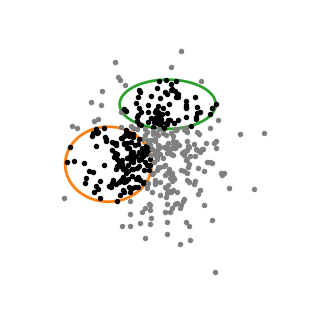

Ans: 339.61445725301047


In [60]:
a = [0.61945705049111366, 1.28936356059764279, 1.43262068358499350]
b = [0.51828968931279662, 1.11800659425144078, 0.73371012167741767]
wel = [3.21058202241660640, 14.41516963135681806, 10.51128296070730883]
X = [0.92459321199138866, 0.61078367390753385, -2.44483169186527549, -1.15201906047049962, -0.47134459961744757, -1.10986097546799689, 0.11877259118274322, 0.42864407452831699, -0.15349870844154465, -0.91209630355094162, -1.17102500859864245, -0.22416850707078312, 0.80689296705911917, -0.85367629892480812, 0.59304675370438931, 0.10217741272457034, -1.01844140636038949, -1.59690825582822793, -0.71574712498482207, -0.64579435796043272, -0.74885857331285910, -0.18496428164479231, -0.71224672457403981, -0.67145016019271442, 0.64332868271639454, 0.94007886194491197, 0.00838115547462495, -1.43170700080235558, 0.94655601485233343, -0.11596474537923923, -0.78822921508217647, -1.50858849864880296, -1.56120955802756689, 0.37258725555520772, -0.12624041336153327, -0.84420827693408829, -1.15523719216683918, 0.97835309489925371, -1.07474543081439133, -1.20935951313750745, -1.49732811219047401, 0.01624918106238015, 0.99103745036778890, 0.38382147282080770, 1.17135408586829293, 0.68812535888553217, -1.62334581272247180, -0.07754204444410163, 1.35440057788534030, 1.48346339953969131, 0.17584252887641444, -0.02982138434654751, -0.96592815799132437, 0.92987626434474935, -2.11284212804721916, 1.38808980641290258, 0.19164459691156666, -0.91903483390226504, 0.30907440820464105, -0.46636594802417397, -1.10118375649626676, 0.78875235514647402, -1.35958369349766417, 0.14153250970119557, 0.12343151165091842, 3.27624250389222471, 1.06808004588950722, -2.59169948555484631, 0.46840554995009254, -0.44474726970734946, -0.02862418983273837, -0.13098216974521590, -0.63323807143798838, -0.64169654093824424, -0.29285947426501496, -0.43264103077333865, 0.53309089346498106, 0.30516377835132302, -0.44864030353538142, 0.53660327827165089, -0.13651884314927332, 1.27578463340653925, -0.08492423820123478, 1.02436476366419016, 1.70604933973403061, 0.66325267753196249, 1.44463661373919594, 0.99879210929433793, -1.74220150196759027, -0.09835287990671164, 0.04747316317992414, 0.07993394893367085, 0.55346784163275820, 0.39037165480405067, -0.75622239081014753, 0.94568070759590628, -1.27192820697709386, -1.73903557755677429, 1.84964291630851352, 0.38677449250846574, -0.39271605903961238, -0.93688029130845851, -0.17832480256676064, 0.88092066906813282, 0.47601990084278112, 0.56425428426040170, -0.29270042196158907, 1.79966805834038435, -0.73334229403201212, 0.16465865608365834, -0.49259641100716539, 0.70211038401357173, -0.13178002901866029, 0.98467192555217264, -1.68076047836891140, -1.03831863565553428, -0.82735286632988447, 0.68839441794379763, -1.68178709961254857, -0.52051325003499627, -0.57842072616869777, 1.23212027995642837, -0.54067428524963534, 0.01490767976617935, 1.22032645954309116, -0.40482628101019663, -0.70002154093396585, 0.60254304234927547, -1.10606706844145153, 0.05081736680351225, -0.93349998848736748, -0.86543900147388142, -0.19345332682197702, -0.23164891940614429, -0.37182630038004527, 0.64912928926373004, -1.82979385686494678, -1.80835275860937972, 1.56255499311548007, 0.20196362829868922, -1.11945347818378993, 0.58848191750385992, -1.61014751710390813, -0.30426089348857632, -0.62831392396350128, 0.54361540277916975, 1.34165619203681463, -0.97984396062695689, 0.71127200721841344, 0.33843320963756790, 1.54631138157803383, 1.64902011436666895, 0.45989801528380553, 1.78504395278231986, 0.06721055678731754, 0.42297395087987361, -0.48684669641694994, 0.46461575851382603, 0.38160865637967895, 0.39210388100434951, -0.79431144924454400, -0.51144223582727033, 0.95366661990733481, -0.67988880294671239, 0.46946811166100200, -0.99465862619915335, -0.92142059797114007, 0.00908596025035510, -0.62397521620830965, 0.86793609786228354, 2.08696876923732022, 0.13258915963878279, 1.25505347877732643, -1.84814901743961824, -0.25164293513126473, 0.31385209193333863, -0.41526978324055530, 0.46468139433751865, 0.94728054166866726, 1.03960537675834486, -0.77453469591478064, 0.76235125649355595, 0.89072296284660901, -1.88858692553460616, 0.02452789474445405, 1.48920696991099666, 0.49378047988967189, -0.39391304660950899, 1.25090890294765078, -0.37910668479085247, 0.09843358390724082, 1.72281974317150244, 0.65244658645965592, -0.64670366892281506, 0.36571543275217455, -0.56172397037022903, -1.72584459077246088, 0.76064611193490372, 1.71904604609672962, 0.68888708894745954, -2.50524035233752418, 0.79836333364145295, 0.93738585319014711, -0.67621785217471553, 0.51247087956839721, -0.71008683591627708, 0.88561008161474897, 1.04537429693490225, 1.29948926755076388, 0.19794826449406164, -0.22400287330360527, 0.17097106622017202, -0.13791254187629526, 0.43297529291753678, 0.48512480463159341, 0.37843704320826305, -0.45515719907066421, -0.00764737215404114, -0.83658686561692586, 0.02628979329889522, 0.06556452208896099, 0.06612940513187937, 0.88218207189357034, -1.30540138597068678, 0.12253890821468619, -0.76883692478145038, -1.72343168530763924, 0.56486036334268641, -0.08962593865360063, 0.60511783616701109, -1.13499637847474366, 0.07409913057774367, -0.48019821409974595, 1.83064363142994480, -1.26098956206866109, 0.93711388377608706, 0.25670677159197824, -0.46236245595185282, -0.89282789385393546, -0.50250027164964228, -1.48434894375825999, 1.97950027460882572, 0.29493425103332288, -0.60274372276538446, -0.69552682859355686, 2.54848910843440413, 0.14159748078907961, 0.61031009914416412, -0.64880859572204219, -0.54963399433426297, -0.86485519779170295, -0.84497159241570952, 0.65178424905089560, 0.09957893417437634, 1.02278943979898918, -0.37936091452993531, -0.72444578273232363, 0.09679504547833574, 0.25712802845423616, 0.52761610673440029, 1.84286372625559647, -1.03691113504226728, 0.58324781312782414, 2.98228759146184164, 0.17139200847928307, -0.28158677772990232, 0.35826426569988767, -1.18082511539223600, 0.91458123193501595, 0.69360015530732300, 0.50984599725271429, -0.21602170656131559, -0.48930549459296480, -0.85256648302038396, -0.78378396808167339, 0.39777321080426581, 0.56616553376816758, -2.31476110027141146, 0.50447717197985265, 1.64612963838169368, -1.44751944367621244, 0.26496477615903086, 2.00708749843248313, 0.96503459009913506, -0.27049577415235565, -0.58444821196301511, -0.90701809126239052, 0.06567613700806926, 1.27469900052925911, -0.34999334988858283, -1.67115916833375699, -1.00944443869544709, 0.54443082265501552, 0.57146918921608958, 0.15626969978834282, 1.35673959372032282, 1.26890624609924707, 0.48371412297414379, 1.20851967975620744, -0.32785391981251533, -0.41366302119092796, 1.19378364773871759, 0.39516947657130924, 1.64715699847839891, 0.49932896384940867, 0.33552781067516224, -0.99364222428880455, -0.09604428320700668, -1.26162345583981428, 0.31988781666881266, -2.05083267862760055, 1.40835860203581431, -0.08868361895690821, 0.72115121708100816, -0.19080687756982045, -0.64193489614725130, -0.05468976184143043, 0.32116681504892219, -0.28026468303182872, 1.35295693983477383, 1.20480618173663090, -0.70337883037860249, -0.74357349731808453, 0.04388508959441868, -0.20460651971416627, -1.13803537160736723, -1.03985025016563903, -0.91127010332703540, 1.27712383329748635, -0.74265445241216033, -1.05349829708915088, -0.71031094070392187, -2.05785986172947188, -0.41108376889155740, 0.02689247596533620, 0.64903123757096459, -0.23405740129692451, -1.81120777033056490, 0.38306657421973400, 0.90748904757779680, 0.23597340788074953, 1.28936608963826127, 0.39026182811643140, -0.50566899422723732, 0.04542469324907820, -2.68690406134701387, 0.63394677556728085, 0.16950523161889766, -0.01352737371535373, -1.95108565405237000, -0.17766002908530953, -0.99646133378571788, -0.72825113964023069, -1.23399479086070030, 0.37549566379737764, -1.84022861324088405, -0.24313041993341611, -0.43457484476688074, 0.84246693946746032, -0.82692694225234753, 1.90495091493660196, -0.07452264014887769, 0.81722241611742075, -0.62578536727530243, 0.96546498596246755, 0.35674910317045716, -1.18881011607909848, 0.16282150074459795, -0.45560387507696642, 0.07476107333458903, -0.16056709373995265, -0.08309309726312356, -0.51495728016095521, 0.33765101235414513, -0.32941774438973642, 0.64473666945635111, 0.39298609267478596, -0.91007973634423533, 0.33909149363602992, 0.29900398129492567, 1.06019517934455010, -2.38373697665405038, 0.14086485993348449, 1.08994589199767988, 0.03168317597036565, 2.23188940529333513, 0.13885038350994264, -0.03751441162007994, -0.11043708916690669, -0.20279821980491461, 0.14086716397394927, -0.96359663853506783, -0.29557834869287253, 0.93129260792580681, 0.98509568580342555, 0.88372045001691635, 0.29209163045665920, -0.81454010942025101, 0.97162971575339907, -0.95567208263946068]
Y = [0.04356990386402864, 0.10915405981254768, 0.78645244353358568, 0.21924760380925695, -0.00425848612756275, -0.21297943463050384, 0.19777776597365998, 1.42620967089458439, -1.53785956816699731, 0.49189954833741217, 2.68285036558735657, -0.97012029295153157, -0.52547885549070950, 0.57831371142880172, 0.12758166775033164, 1.36659039272789751, -0.41933846744001552, 1.39276769986135696, -1.20637225434494089, 0.55120947577087986, 0.48969609259926250, 1.40636236540799486, -2.20484347020531457, -0.49461702533162549, 0.30732580757672745, -2.08357392279923781, 0.01499725110026605, 0.38174384321363314, 1.52056307611464492, -0.39661497147065700, -0.39298068756768706, -0.37870318914093859, 1.82852071892946588, -1.21629976500652304, -1.73296090430609739, -0.62151528587337546, -0.51253335632494090, 0.58646304736412624, 2.23773745309902061, -0.14764216901859778, 0.71738262486082438, -0.93960777681743102, 0.19096506566537386, -2.10186970660075279, 0.23302566611080644, -1.53234792778412876, -1.36157018268693508, -1.19234639598552628, 1.18876918257130804, -0.55786256577717097, -0.88355892887228538, 0.74760226717247824, 0.42466542997315954, 0.69455720641247443, -0.34073047801778339, 2.11710433701768030, 0.91206914897653613, -0.88184665767810300, -0.69308595855469790, -0.23367870474850772, -0.41355919276569136, 3.02067603806780349, -1.00558464835926764, 0.13198978786805010, 0.95697249941228912, 0.56630144496155443, -2.63405683933121448, -0.31208916350169413, 0.95564385672712659, -0.42064014113075748, 0.61644419287671071, -1.56814927105805824, -0.28929673658713462, 0.53503639688015614, -0.29322841094191993, -0.03448877093590011, 1.87625735687441297, -1.77675197077268798, 1.30506840249837297, -0.63410735966818355, -0.22225602954878948, 0.60378209369085389, 0.09637292639445066, -0.90251116984546986, 1.30902342257816762, 0.68212041355449216, 0.09104685773623347, -0.45273002773569537, 0.17518784716389826, 0.34463444535145343, -0.11409201732318108, -0.14180020779894423, 0.47741354462784485, -1.55346784579069719, -0.13443100080870463, -0.25085682559883038, -0.92403409821320592, -1.00016809706492960, 0.12171301285255941, 1.16996036881176235, 1.19010341016315468, -0.50037797782760807, 1.20131208041588078, -0.09702622195259065, 0.08070204402309800, -0.09535399966577512, -2.56852516940130382, -3.58762744308512360, -1.85388229811430749, -1.27622819320234360, 1.11739183230410477, 0.96782405222985191, 0.21023151839455395, 0.33365442336797935, -1.09972982172589884, 2.13311626570098678, -0.18269129304522730, 1.73830010797513368, 0.59539813986264367, 0.67262667110651997, -1.03418435391404695, 0.09667534029326419, 1.46330470196823548, 1.01295189716395684, -0.12146518025976288, -0.22270600313094346, -0.06172175537166541, 1.83184537866649078, -0.04678450848692194, 1.25924439251306985, -0.74776647809780272, 1.99516191674419585, 0.06714508509461473, 0.10853831497836339, 0.39049333714380463, 0.17418117903496644, 0.55932910716148254, 0.92824349121916516, -0.29613535317105361, 0.99113058083859784, -1.46211562612280899, 0.85533691822902636, -0.85081269388983571, -0.90135006583213362, 0.72599123009890532, -0.73550081194343075, 0.55060301425978686, -0.24509803272927688, 1.63766010805906537, -1.07002495134421238, 0.26835484592405029, 0.70608205543235458, -1.17595238560897886, 0.26923132143649309, 1.92346712327181923, -0.52112074803063835, 1.64809640810303204, -0.62034217775258638, 1.71635604626790861, -0.02611290763287505, -0.80699547708741737, -0.48366328082923615, 1.31149090970575166, -1.07164201098859890, -0.76963073046952768, 1.17932014508685001, -1.13514508366093114, -0.89480425447956458, -0.08128233546026722, -1.44866526093532544, -0.63967653295668614, 2.12747931093926645, 1.04146392558989365, 0.46281499759157330, 0.19056580495902664, 1.79611470948812180, -2.11771292030333314, -1.79900817245955058, 0.71011376414712302, 0.15228890244711205, 0.55926984382026046, -2.73036234450188209, -0.56324737737172537, 1.48756507286570749, 0.37613839238137137, -1.58471549637949427, 0.57370483126428184, 0.81851022251745909, 0.99853394815760588, -1.79915265930455948, -0.45476029725149308, -2.02151759240383910, 0.66359071037172257, -0.20489931772948200, -0.62990979146910098, -0.80163503998338903, 0.68584028272777064, -1.68299484562854218, -0.31416667940093412, -1.19211199551129710, 0.15700030482492075, -1.56845257600867627, 1.40504310895274931, -0.71544742985067333, -0.85125183227240642, -0.25716285703750341, 0.68035581554274549, -2.20258084015992672, -1.25177232283031103, 0.87143291648148735, -0.38690891603829086, 0.79922330224011162, -2.16087909173555026, 0.01434371311710062, 2.03562955946472179, -0.61437116172010253, 0.39888266566591374, 0.89198593092945844, 0.65054126618852870, 1.20101684463657654, -0.52817731857423722, 1.15720224514526770, 0.67883485776894936, -1.05332175542655881, 1.13006030074495345, -1.05147120713639275, 0.57553598435278031, 0.31854857732809416, 0.99950879513881064, 0.64608437366048188, -0.94798324558911906, 0.04601264809215490, -1.03686369849871096, 1.43043779282532757, 0.28921462166422474, 1.35648054526086703, -0.19093129608013445, 1.86359354162225399, 0.24798195719404403, -0.73929624632371371, 0.44790795741189599, -0.63467840601676784, -0.41188877546881780, -0.14699887584892596, 0.78627446129804768, 0.54213315072327006, 0.18948037673124829, -1.55492929152979231, -0.00888387429777165, -0.10762298422514639, -0.48134836742075737, -0.85685724506520655, 1.63207836894874458, 1.18421537862706039, -0.34399323893964784, 0.12468820173143243, -1.46139415329900912, 0.49348089231114756, 0.56325918438111633, -1.65795345492385771, 0.32104621368538672, -1.28992179897485704, -0.80086886765642229, -1.09669932768729228, 1.60283669751557767, 0.52168183936255241, 0.50114557698810203, -0.04422386771432615, -0.00595771424403940, 1.73497798696049954, 1.86122607083133840, -1.08495132010077211, 0.22908434883882703, 1.21129016853737936, -0.55840201599861616, 0.27897376196513674, 0.21301412934596251, 0.72662138697489520, -1.19207708814113933, 1.13376962786382718, 0.31535818419908451, 1.29959127148663578, -0.68366220836021807, -0.20591406836308027, 0.69276505641432995, 0.19757237912122222, 1.27855703823363376, -0.19902014120032088, 1.35492591921972050, 0.03629867565869713, 0.97682803384690819, -0.82747867645071516, -1.13208240002940386, -0.80954146134816063, -0.06197699767366878, 0.01409905876476173, 1.15095977946442973, 2.53266096420742670, 1.64030758710900870, -0.93195737179149296, 1.78699090934869464, -0.95985613751846222, -0.99809967278762657, -0.30459811617725946, -0.05828168181600565, 0.11255015662710510, 0.40340473440031888, -1.97332888546375984, 0.04603308950767340, -0.38419403299174082, -0.78740613125162351, 0.07601501106348804, 1.65669743226514221, 0.22231967247809137, 0.29332710203919071, 0.43863007687328281, -0.63072943531589176, -1.04410654274713455, -1.68270338010045251, -1.13729929121232631, -0.85425511348518923, 0.01336814497890497, 0.52353364433337379, 0.55886439294343193, 0.60152531302143397, 0.28159501237092899, -0.88944324419224685, -1.19543573649419144, 0.05461861564986190, 0.11560120380818731, -0.28824725917496158, 0.30203214574047588, -0.92575711510948655, -0.19278517067448828, -0.84625292465548219, 2.10405955536996014, 0.35657893926892553, -1.20031071197230998, 0.17237092006854862, 0.65334249944395673, 1.13960174390288604, -0.48247717772047855, -2.44079022313906213, 0.93879463282056186, 1.02307807345725243, -1.37219773803557410, 0.17439993490307745, -0.43699002375964424, -0.29372547071725941, -0.55760069091012443, -0.93064680610686512, 0.73288539993287483, 0.54647211540665319, -0.82074861162760426, 0.83505020042506584, -0.60720748972491279, -0.05775321344104395, -0.83300458507386499, 0.01401609345637881, 0.12950214520727635, 0.96956489756985087, -0.64619097987270580, -0.04079400500203101, -0.49856391063830546, -0.63370450365887809, 0.86084568972342568, 0.25739092664757018, 0.94431199401270638, 0.83499357432314714, 0.86800460598221962, -0.53934409440377373, 0.10110926070661465, 1.03648520057512039, 2.15722492210502104, -0.12427477705458773, 0.29173003427805200, 0.94632792294179091, 0.26144718126463445, -1.35414775352619476, 0.13819878052139084, -0.11484780633672036, -0.28008218397650547, 1.06320763678941521, 0.79032784716562077, 0.32891518445951051, -1.06464847685183805, 0.85804904140488580, 0.54782212426127030, -0.08378462835906524, 0.88018196510500546, 0.69151976432966866, -2.19439272753961712, -0.52745426089308445, 1.04665101256934112, 0.05352006514728221, -1.38944998765234540, 0.71550778465357479, 0.26136137368508028, -0.84800153899875863, -0.35823170873316129]
wpnt = [0.85677094418327360, 0.38497130508554589, 6.59570944748877253, 1.37521742746343367, 0.22218386629263059, 1.27715162444230268, 0.05322297312979486, 2.21780976798147611, 2.38857390489600574, 1.07388483260584167, 8.56898565489566444, 0.99138490235870913, 0.92720428785729470, 1.06320997217251367, 0.36798153402527062, 1.87800952516727637, 1.21306764846426884, 4.48991784330944821, 1.96762796297733322, 0.72088223895313575, 0.80059142593115629, 2.01206688832034475, 5.36863012477346224, 0.69549131937072772, 0.50832094600829913, 5.22502855844464520, 0.00029516130765427, 2.19551329797799122, 3.20808035769636213, 0.17075125776554184, 0.77573911631023607, 2.41925536372096683, 5.78086330363096224, 1.61820638135708483, 3.01909013781909774, 1.09896886541828587, 1.59726341151123119, 1.30111368422256546, 6.16254665005850377, 1.48434864208870532, 2.75662930600809508, 0.88312681014099326, 1.01862288433606829, 4.56517518652426890, 1.42637135554672900, 2.82160668132565595, 4.48912499006571686, 1.42770269667624450, 3.24757309480739975, 2.51187430006934598, 0.81159697575159295, 0.55979846484577411, 1.11335793381480141, 1.34707957997124672, 4.58019911670132895, 6.40892408448648077, 0.86859778404017973, 1.62227855358380513, 0.57589513575273354, 0.27210293452942680, 1.38363687149223957, 9.74661400470611206, 2.85966830464058219, 0.03745275540377188, 0.93103170269983448, 11.05446227087553979, 8.07905041725488005, 6.81430586940044236, 1.13265894012434565, 0.37473826224264539, 0.38082278717499995, 2.47624846511108387, 0.48468305691846886, 0.69803839663860767, 0.17174957265030444, 0.18836773682928595, 3.80452756992065044, 3.24997249726228610, 1.90448165715597439, 0.69003522183723787, 0.06803513720560828, 1.99217924749796893, 0.01649986717589027, 1.86384958073263052, 4.62414667046518169, 0.90519237284106890, 2.09526447605949251, 1.20255015560219625, 3.06595685525204908, 0.12844618990864798, 0.01527068963918076, 0.02649673512395446, 0.53425034431574714, 2.56565237678004232, 0.58994399834104538, 0.95724114766861601, 2.47164037836465766, 4.02458096239470642, 3.43599297534791015, 1.51840177264533627, 1.57057202990957423, 1.12812280093706829, 1.47495044976360590, 0.78543531293784019, 0.23310776590787721, 0.32747528255847885, 6.68299508286448862, 16.10987579058815200, 3.97467049547772033, 1.65587087414779499, 1.49121573103706484, 1.42964238741429628, 0.06156326737463862, 1.08090407520364229, 4.03436146644016880, 5.62829059214769245, 0.71788887397881274, 3.49557414004254152, 3.18290679337508475, 0.72336068214583316, 1.40410781434213838, 1.52746650570072573, 2.43358933353255047, 1.02629378488407030, 1.50395045787651238, 0.21348228162710650, 0.49383973285772370, 3.71871560922529998, 1.22557315012502954, 1.58827884484445314, 1.43057693427270705, 4.72965573929848215, 0.04193265211085371, 0.06544178768037676, 0.29073984400801672, 0.45170791731004634, 3.66099460873875859, 4.13177567856089833, 2.52927425390786231, 1.02312913542902750, 3.39095819397027887, 1.07791221091454803, 3.31645726691995968, 0.90500663248205837, 0.92184165322693412, 0.83647915050820487, 2.10320501694268902, 1.02016723282488320, 3.18783849778054051, 1.25949043388477011, 2.46309321212868859, 3.21781920658944065, 1.59437019768143196, 3.25886741780716926, 3.70424303325122883, 0.45047379715094182, 2.95324147621421362, 0.60069222055819937, 3.09150324418431133, 0.15442733744371615, 1.28217237844051635, 0.49550332981049772, 2.62948842816630091, 1.61066538408800186, 0.81273176914960588, 2.38014178728005632, 2.13757027932507571, 0.80075720850840038, 0.39595188850008223, 2.85194410821322197, 4.76462471058742132, 4.54374810372833515, 2.65980634289618045, 3.62985251265871423, 0.09963949282115969, 3.32453118525053304, 4.65715700569232904, 3.45235920281971254, 1.40160198265527969, 1.10397124919340617, 0.91268675338254024, 8.03605797055111815, 1.11063500465836840, 5.77961042131021330, 0.14208170784383750, 4.72906060369679881, 0.57295639573605284, 0.82512647265476557, 2.56184312909691148, 3.38067216993577935, 0.21649609839709016, 7.05464124385973612, 0.86603917907450467, 0.46020936580423721, 0.53053412314175663, 0.95815255621766371, 3.44891644491067106, 3.41105415801392642, 3.05382001104660894, 1.89569643116043185, 6.30087831869535986, 3.09742749569134634, 2.85283837577662736, 0.96913560847971958, 0.98725608435273582, 0.57035604958128128, 1.24718925240051659, 5.94416977813174974, 3.25560630468361323, 0.79857884334364193, 0.19987579655819623, 0.66798899232805120, 4.68841831830663835, 0.18767334638301245, 4.37913377943537885, 0.52066652002552116, 0.36627545683459739, 0.79569738327695494, 1.12308152273692641, 1.44313261433249740, 0.28326998641302514, 1.34349013439234444, 1.23906197209262214, 2.81355949894907731, 1.29205206734622191, 1.69670191634426049, 3.30145844320725335, 0.42054042619338450, 1.00705064043937598, 0.78359261353570286, 2.18688901306846351, 0.00760784493682999, 1.30567665408901123, 5.39740838443801074, 1.67373977303049437, 2.71822190083712112, 0.10235312640401606, 3.68675992905000482, 0.85863669913744300, 0.79906546283629742, 2.40391332514915890, 4.32123801624040205, 0.25663857578978932, 0.38490866483392261, 1.10198509778294618, 6.78870508892192337, 0.05595265973202954, 2.79028351877470104, 0.42103151710534698, 0.31368023446136273, 0.97967076396595409, 1.44818133041027530, 3.08850250970123419, 1.41228202710813666, 1.16442958660051965, 0.15946185112400726, 2.66049456341517665, 0.25289267190535947, 0.38337573180644285, 3.02718841477952250, 3.49921738487038470, 2.73908294944517472, 0.98156895469966932, 10.09678869353703057, 2.59846069947320624, 0.35144305491300537, 0.37950017341221742, 1.39630370361670164, 0.83649432416678504, 3.49122979067984973, 3.72410542765687724, 1.22378474469407128, 0.29189950592177527, 2.19409348036505936, 0.92613012009317242, 0.23604988709851565, 0.36591843092801257, 5.88609759133903587, 1.67554500111984739, 3.99517635542512650, 2.19476332416203546, 1.75914380552925587, 4.49579424150393336, 0.97369236363764100, 0.55309138722303197, 0.38061455745838541, 2.45738991789403194, 0.04392237157569835, 3.46068178852369668, 0.12381293882080725, 3.74696597361519057, 1.70369903479379348, 1.57801548111315215, 0.98193441186501018, 0.02826136731258074, 1.84094110862643867, 2.93483147533449173, 6.64835091238473730, 4.15112879668542423, 0.97603273557293835, 3.36445360519568082, 2.34644320234021952, 1.15236187203240981, 2.80590619001510344, 0.25272616857422620, 0.12524644949325342, 1.15006024962619491, 3.90325139454239212, 1.59381278965481710, 0.24993327023959874, 4.82592309125950791, 1.98925223383525540, 2.75251116634520976, 0.56948511466818519, 0.12244805331865424, 0.60447675522944433, 0.40081059062417607, 1.19330659569604247, 2.91003895795641920, 3.12394215883913562, 2.18130973446639320, 0.49492048632494784, 0.82698902266283092, 0.31425531078874086, 0.40369653011507761, 1.37442025802170198, 1.87239782740877092, 2.25947980130507586, 1.63402847875197299, 0.56489927400950768, 1.19294514439161836, 0.59576504954428655, 5.09181344669308000, 0.20615598707807894, 0.71686721775150342, 4.84830815988653185, 0.18193140703202162, 4.72121939258128975, 0.17645173436972095, 1.25039279305333340, 1.35437558393335356, 1.89524914013017898, 6.10976120785601129, 1.13703649433547938, 1.04875214714577591, 9.10238006715302461, 0.43230385154635004, 0.21969230441163060, 0.08645764198771046, 4.11765375995241278, 0.89766656365150199, 1.53005619916478164, 0.82898149530431731, 2.19637142735998347, 0.83830583076057597, 3.75514228456849741, 0.06244783475976604, 0.88275193445824052, 0.70994699497144731, 0.70057897343610376, 4.56889407891743193, 0.42311640636360676, 0.66951662824890057, 0.64017329888684538, 1.33370403707705276, 0.86832522412832591, 1.47951958121249461, 0.91823598314097676, 0.90478916014609312, 0.75902121409248813, 0.31667384376032154, 0.01712754541341708, 1.33948257140201621, 4.76762757069479370, 0.12396027053078920, 0.50079178584154149, 1.04997460677511967, 0.89659975509561551, 1.94869917943635373, 0.10850228376781582, 1.13720383692577953, 5.76064800364884189, 1.15025338769141316, 1.81260015348806292, 0.10918902220760297, 6.11480669672357635, 0.75552758645670148, 0.30151641090933146, 0.01921621461292598, 0.81584740965215152, 0.49804314234462399, 5.74387792447484280, 0.36557455755027535, 1.96278426368967751, 0.97327790756189059, 2.71153310196520403, 0.59726891048269592, 0.73178535750890672, 1.66317091467929412, 1.04163908667832472]


used=[0, 1, 1]

sol=[(-1.37023941083175882, -0.36546095413509416, 0.00000000000000000), (0.39807449848209164, 1.42421354306320036, 0.00000000000000000)]
fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt, lw=2.5, s=15) 
fig.savefig('MCE_TA21.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


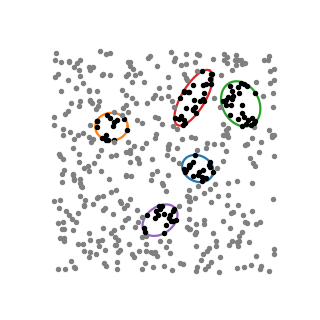

Ans: 79.38679730901868


In [52]:
### plot solution of TA37
a = [0.727604862050386, 0.733768814465708, 1.070839309882361, 1.428481803323501, 0.874852885152538]
b = [0.583213790146940, 0.622514785664848, 0.825871042899764, 0.537765714925542, 0.603101889025286]
wel = [4.243491893257469, 4.567819362646702, 8.843751776306085, 7.681885382223896, 5.276254276547167]
X = [8.603578880667017, 5.898350742158299, 0.012380036512738, 0.667217344047135, 0.463610032343096, 2.884711370861723, 9.376572207914872, 9.735418551512785, 7.089512107745144, 1.641545980587285, 8.670758342859008, 0.431052631720555, 6.928215581464667, 5.990643856767300, 2.911114034194821, 7.258834589455278, 1.948927888511119, 5.570591473771636, 2.719524069592701, 7.989426882867038, 2.857447204705967, 3.764336326636224, 7.862835523514029, 8.949761097033932, 6.787235617619590, 3.585199167707914, 4.767858022444549, 3.802782137051837, 0.105190181235983, 7.078216621757148, 1.165015981593602, 5.289245903462336, 7.893927555808782, 7.864793782041240, 0.837784534347646, 7.217330174522826, 2.718442029278628, 5.231967680169106, 2.917912928892084, 2.138449399562674, 5.881791057795589, 0.416473535410918, 1.969383914582852, 9.763267108834974, 2.860102417129205, 7.680801649658421, 4.670385424837137, 3.146701077491405, 7.528029773297446, 8.526515331844323, 3.284183179290058, 7.097049403205134, 8.346525263736210, 7.434870570340138, 3.439161081411327, 6.765461979449025, 2.728762111161122, 1.115846151168759, 6.374424812138567, 4.566934956328240, 3.568962205668973, 0.498520762367649, 0.878682004640020, 6.286116035900328, 0.779701706120242, 5.137152810036931, 8.491385838287815, 2.544065205068533, 8.615622135292542, 4.915294206000416, 7.787309767387529, 3.443333773969167, 9.164540333612027, 1.592748829185925, 8.899114063732092, 8.272832185621070, 9.064824836581565, 6.321353737052032, 4.190023916567799, 1.773695960898528, 6.146597716212795, 4.685930793584488, 6.142923513280366, 8.335490973248485, 0.904720193668946, 9.744574638674395, 7.663079588599374, 6.420765426818455, 9.979025916402410, 6.147552309132926, 6.317335524597275, 7.169732679280623, 5.222578779273501, 5.921255214347962, 0.940588726952629, 5.861240656876881, 8.567491851042689, 7.665966972480210, 6.819281396988490, 6.720789926270587, 8.840878286039725, 7.135382421357276, 6.121129674561444, 7.891324902224635, 6.188938833540380, 5.259533664523262, 5.004970409218076, 5.980798494000624, 9.972088005913992, 3.330434111619269, 7.723378038264879, 6.642917751368380, 5.996210476241661, 4.912572672905620, 4.160856514007762, 0.072376837612182, 8.267776030457030, 5.444590798770066, 6.352758487990408, 1.352566659303841, 7.792059509459476, 0.539668469265108, 9.670120943617924, 1.082704758009954, 2.037953797796131, 1.339908369300284, 4.234584002279145, 2.010538311407553, 8.381208374846370, 4.861302836619549, 2.429753631655349, 8.797726717120845, 9.157839083574643, 6.496402730326444, 4.286402125390950, 6.738300945894195, 3.706528630478805, 8.341072187481052, 9.899170125707288, 8.084719662020142, 4.212954487195498, 7.902797906589876, 3.998860470509379, 3.266587774316598, 9.114424785447103, 5.351454151380997, 4.889952038300443, 2.760267720160683, 6.440630807967645, 6.122190266589708, 6.872591780165797, 5.727972852633124, 2.250741518317219, 3.818271614081339, 1.135630220937391, 6.862696944936224, 3.015668133964056, 0.009702019515463, 6.384477808990794, 8.042791578546479, 2.034876913642329, 6.874575347055881, 3.340488572895002, 1.209075053955009, 3.984784776072544, 1.613694537843433, 1.198139158790502, 8.347101165649399, 1.616682720592666, 5.927446460978732, 8.642103809970006, 8.252173906725067, 3.085335369281768, 8.856589110076076, 1.237074963641493, 4.471053681927365, 7.694496841638832, 7.659739104539548, 0.207757207844905, 4.725402753169411, 3.650281889081410, 4.470281602554559, 7.837520445018912, 1.215207990935403, 2.995364688975654, 6.467868719031758, 8.254784459323584, 5.004398473212794, 5.429901269841993, 4.568355835964582, 4.583424740638817, 2.248462790453325, 5.754144225027470, 6.124651961517893, 6.143532283463641, 1.622758431312959, 5.296696804189668, 6.124803197121111, 1.631486508713774, 0.437023333898275, 1.961248016152732, 7.969479235310169, 3.363284961346685, 5.001614533244850, 5.372886753952441, 4.791088048724783, 2.599099513891145, 3.753631261858493, 5.274290911819818, 3.044977367149441, 5.969172699157196, 9.320058684591556, 3.349907995067650, 3.296902727453244, 6.138037594074111, 0.296895915999460, 1.101056528847297, 5.407334957521977, 4.662407346789891, 7.214237600079279, 1.360650615339488, 0.287505649375638, 5.231970989585927, 4.735845234225653, 5.888377475965810, 1.203849390292635, 7.380674761894030, 9.388535552853272, 1.219429260656832, 3.183313943864649, 7.281316236532300, 9.134819679685318, 4.153531771861197, 3.618767288220269, 9.946246116929453, 9.317897748647919, 3.494813478049428, 4.572198871691652, 1.902327577109123, 0.971506483639599, 8.924600049244310, 1.753902665573014, 9.747924904727597, 3.393463400915028, 2.151276757886423, 5.484492521990462, 8.727624117474011, 9.892738517924741, 7.842407817755435, 1.919774710292181, 6.464210851330150, 5.664814074221891, 5.391463178772200, 5.649871423664008, 3.270988685070252, 5.489949349495405, 2.378999693266879, 3.569482640414620, 6.018055638373148, 1.318679082324465, 5.404771482235175, 8.967046236814078, 1.663226128976939, 5.183684638100299, 6.138348769911516, 2.570185694065811, 3.722901687189264, 3.977877367115595, 1.294578045117417, 8.505065031691920, 4.493666361440459, 0.094750168432290, 8.286998170155920, 8.100286199443900, 1.376512767927274, 6.004193087195833, 3.461611660071972, 5.781289478630216, 6.196299217742434, 8.398064260547082, 7.087521688828200, 8.028680092345500, 5.087529093138288, 1.186348652211152, 0.457592127302139, 4.619983516905435, 0.541781981279915, 1.831272435340315, 4.627407197858727, 4.080724704586785, 1.442078665576124, 7.255005525715637, 2.812078357907849, 4.001865078415419, 2.021973764372187, 4.503097418344035, 6.374239581951599, 3.848224696846444, 8.965280940159895, 4.118766421593739, 4.377743562557955, 9.900556357153578, 9.876806229146993, 0.916829588924883, 6.996457165385927, 3.442821625672963, 7.653123097526216, 1.006309374868979, 9.886579281187196, 0.379273308081896, 1.382919701750635, 6.378974940591407, 2.913522048894341, 6.458482565359120, 5.698404788658301, 9.003459394435213, 8.502199920632270, 3.861612186297501, 8.598920926049979, 1.633348896909553, 9.092791135321111, 0.689123292975993, 0.877083131103827, 6.796898777753551, 7.039810563440830, 3.460533271883428, 9.976818223488277, 2.770989719751840, 5.892412750569918, 5.181948473653878, 3.379173224254977, 3.782333117857122, 0.781754427284658, 9.777589135622025, 6.305203573763604, 2.577134522443230, 9.120416232060661, 2.367524691108546, 0.924549352622649, 8.312470281274663, 8.370890487882594, 8.529905725172611, 3.117147213859673, 6.428663016863322, 8.059548463938540, 7.946315629547813, 6.032793303356147, 0.901060973078674, 2.813697108058490, 5.157913581457895, 2.037418618842186, 7.840139928964218, 0.707063096143190, 3.275456445538474, 4.757971504412998, 0.949073230804597, 3.191974598921050, 1.159855440636220, 2.709708112800012, 3.211699148555791, 2.509038770787748, 1.774309997953970, 7.793830439171537, 7.117739230270718, 2.118126207335655, 0.660750932834212, 6.747975991384866, 2.330000483215731, 6.569021574011384, 6.869705290303473, 5.217493684904138, 0.697473053588490, 0.556060228525876, 1.659084960215340, 6.374396685698578, 3.378612189622988, 8.967685346635468, 0.350585524804056, 4.830576860251748, 1.794939700656738, 3.915675048808740, 1.619417386520751, 8.759934765976604, 6.955389362862499, 6.407378458191852, 0.393449985592065, 2.836223105037865, 9.298924645760581, 6.414915068674285, 1.403628150010566, 6.620204375194517, 2.713476489351353, 8.092416365260117, 2.246775817133280, 1.128278475708486, 3.097979004798504, 2.360649249370017, 9.975328755497433, 8.177914001360689, 7.675021869726100, 3.531439211059348, 2.207107134084466, 0.765756008971364, 5.550471847841925, 1.947996931639564, 6.308037732356985, 6.735717661302867, 0.475684886972804, 6.780176071676005, 2.180789976271837, 0.214278640658830, 7.617497858923393, 8.660780455481326, 4.100164668125950, 6.066212821449223, 6.561450902484015, 7.557581258355169, 3.274874547804084, 1.161147869412164, 0.425960088887209, 7.217171209321013, 0.248085381800996, 6.469067571715435, 5.415084155161868, 4.199042336180354, 2.475304153248736, 1.590963067994520, 0.321670664485679, 6.123255276438311, 1.947664194111280, 7.844948516404543, 4.000197371964939, 2.286337441282964, 7.778749801598438, 2.621250271670693, 1.974052016193074, 1.540002792412295, 5.177811643946157, 1.622108821964486, 9.465897020066802, 2.174077448547953, 7.090636159874517, 6.441905749615903, 9.063622676235504, 7.969999840111639, 5.897740102754789, 2.027676659442229, 8.750236614713820, 5.184188237986071, 5.688548397633749, 0.211237042149663, 2.735030390698435, 7.138162906997337, 4.575031532955810, 6.709206712681039, 5.080047553682084, 4.410732644391137, 5.867864474476185, 2.367309671559949, 3.477896244037245, 3.678996280355320, 7.335058337047515, 7.350501903325951, 2.247695442062031, 8.461853838705961, 8.709615075729470, 0.404121988198308, 7.027622079540952, 6.717410388876824, 6.507148993911551, 1.015864434900241, 9.513061720090464, 5.095590398056604, 5.825303324899358, 9.974227026109592, 4.159294561776512, 0.264949464686831, 6.512655415274994, 1.688422233966549, 1.654191253227882, 2.308712482670764, 0.283176974925639, 1.035981034325357, 6.049595568302243, 6.810671696336246, 0.919201580986199, 5.423525580747287, 2.735154090194390, 7.493025810242288, 2.593203187698385, 3.373640016466750, 5.596827796290658, 4.395693711409740, 8.064299932897658, 4.949179539424461, 8.038657661473248, 7.537314354825606, 8.522885998213360, 0.013135949677173, 4.488931975506412]
Y = [0.223133843953480, 8.944223454183861, 6.625497740820697, 8.665942787236105, 1.406224729513473, 0.476853605120190, 5.887218871902168, 0.071527407176051, 4.764597094020260, 9.111103549101031, 2.266614805378027, 5.097304886190143, 0.946963182955751, 9.846858640772048, 0.897920383141863, 5.768945888824627, 6.813950646168689, 6.444078885815127, 1.923316122491278, 2.009166244323547, 0.137500416724146, 2.817466576857583, 7.887714419671048, 6.050575064504371, 7.738869206850699, 9.150477762518420, 8.322179042234485, 5.110884188521916, 9.876855833566601, 4.956776062724217, 7.489131747366422, 9.918064482192303, 6.488814454339726, 6.099044748357079, 2.386780930773070, 9.627444365077192, 7.248095413093758, 5.806379111652498, 1.469092448087923, 4.560204337976973, 4.644607501736827, 6.204888695364902, 6.825914290756009, 9.077118708035263, 6.858512856422236, 6.191202232132136, 9.306235561427304, 7.402730355988031, 0.664747138709714, 1.825477499511458, 5.411952054807255, 0.468295068829102, 8.360903675129299, 3.448632709549839, 3.294523804628267, 8.458071886171640, 6.800804666450021, 6.172750071058637, 9.499066286527057, 6.058385478163873, 8.583778513145180, 4.592647382214140, 1.890128932478861, 4.338822290163840, 0.520984546085717, 5.271758314988744, 8.518306748543194, 9.882498149515991, 7.012929951512131, 6.690554523889264, 7.767546909821730, 9.485855752518038, 2.190586480889334, 8.195270442678758, 0.331008606465371, 1.346784006599977, 6.541376274065422, 7.364437437757686, 1.636219179036624, 6.026201299091819, 4.845898663878908, 4.564213669561392, 3.213065878265019, 3.051588113165202, 4.392237898807738, 9.751557795622780, 7.711161629551823, 7.186629156785731, 8.686608273611551, 1.967266363634168, 4.990955376381089, 8.939140563429522, 2.454773394023304, 6.735037697440907, 4.138389892149053, 0.368644418783616, 2.590413167838258, 5.031629187462572, 8.104453633373561, 9.070540575365012, 1.348498128604579, 8.951963717891628, 2.838204396465831, 3.486134913960738, 3.206914268925153, 0.850908938530984, 1.756873063664925, 7.412942487453331, 5.244322909679385, 6.416201268673247, 9.596765885843922, 0.569897367462061, 4.609887507200028, 2.994022207711682, 5.851027323989291, 9.556266976878346, 0.198285816424365, 7.446439231045710, 7.787772147442729, 6.284263689157250, 6.422908226219649, 7.136151013388763, 9.591661195191804, 9.462508638855834, 1.171603778484793, 8.520516501146849, 2.572059737577483, 1.404144034436894, 1.389334721968634, 7.883654936679056, 7.106975843969447, 6.881970307220191, 0.719021491799122, 9.078182185876162, 9.665901108600680, 7.827627139402545, 2.026155571466947, 1.167233794410111, 3.320302024787407, 9.126054119689124, 7.648641572347804, 4.035920178628142, 2.504546196307726, 4.332516923966569, 8.105429848184389, 7.720640838539276, 4.009857935783979, 1.599650554955275, 1.817052629199304, 4.755627379111186, 5.604840508694057, 7.864212056734553, 2.786879051284861, 2.270331484337123, 9.139756831012029, 0.139628280188961, 0.998438298118937, 7.012152904597856, 5.290725049146920, 8.172516239672255, 5.240408941011527, 8.503147873063263, 3.038307824063978, 7.730538856568990, 1.571913871008310, 8.224405752113626, 4.019505662934312, 6.905765330461993, 6.097459653000170, 4.524992752881410, 5.741593432455750, 9.801142851586901, 8.217116934026455, 5.176001821038564, 3.870962512281007, 5.087767413951754, 9.829552311124496, 6.668668451281658, 0.129904982148773, 2.581110064177725, 5.683157501065553, 4.424190298491048, 3.044065715995388, 8.864653087419121, 3.206497724040476, 9.851375587942524, 9.348599702622240, 0.271967894176423, 2.856845283388894, 0.927707416026619, 7.010611716224443, 8.942071423280499, 9.347786932144951, 4.822742280483542, 1.929785199748200, 0.678212617066706, 2.327993276249105, 3.394674150136525, 0.894712692734210, 2.243844616356526, 6.822708236531367, 7.117450858026118, 7.242233536570133, 2.622877935731661, 0.117965256725109, 1.407469085168390, 1.781991752817120, 6.891253522549524, 2.594425598750089, 3.129200454858511, 8.759636347385880, 2.261876060801887, 5.871056860598854, 4.378467315325242, 2.403789288731470, 1.523671113524661, 1.265164433288232, 6.593108451456343, 0.720557740542700, 4.541464865687126, 0.970036165687270, 3.250406360402733, 8.365005832854486, 6.944338686652469, 6.853527623532845, 9.580021355845252, 4.690718873101751, 0.282160182371931, 3.431714427451124, 6.905892159644777, 3.966570902932958, 8.601527651891455, 0.409486586670268, 0.686786441365986, 9.174447205003622, 0.129239774394480, 4.347033998406431, 2.458845848092142, 7.359229260918823, 0.205111870392506, 6.635435886372639, 7.633360168528267, 6.405105860550736, 1.272091455421229, 5.508203814099132, 9.659435647227232, 5.788042649509061, 7.470828365749314, 9.430569241279713, 0.815449694035371, 5.536652051351628, 4.928446922763686, 5.088624838522328, 6.903581774472872, 7.987217735392314, 6.940921106276511, 5.980368083113580, 7.846735773106227, 3.440471615294776, 1.272311554147101, 2.304969510817688, 4.037980837908589, 6.662393998042613, 8.828163622857607, 3.696079915803866, 6.979942948536215, 7.644663254450254, 6.719680923304407, 3.829307548631620, 9.377888539065566, 0.885553198047677, 8.825827322533408, 4.110232241448911, 2.714534496290791, 3.004924558538600, 9.416595879904662, 5.514453591959450, 7.060218376046326, 6.089698703219989, 8.070146136888837, 3.736922702864387, 2.673141356855054, 2.121874565420039, 4.224487411170010, 1.935084203312833, 6.243290717840532, 0.163061866137053, 4.924161230374572, 2.744319210221353, 8.602040779185694, 3.247698391094878, 7.858872877718234, 3.701443751810714, 5.609651964955333, 3.371257660906465, 0.211417952058768, 3.341940184198122, 4.914489862852395, 2.740779738963601, 1.814704208404737, 9.774083575265829, 8.093317955811330, 6.101563313655945, 0.243069584558477, 0.294440399268987, 9.327145473903609, 6.202534294115475, 8.294100394689268, 6.199813028413264, 4.439446713699377, 3.026026051751602, 1.719576858356224, 1.432056463177462, 1.202285735983211, 0.413022079686077, 4.947047473885751, 7.528860445106474, 0.936534450796230, 8.500245452831976, 7.770648676945918, 4.814855203004939, 2.567229345652299, 4.412452766006659, 3.572400269640471, 4.847315283322631, 5.375467497279567, 0.834980916017187, 1.224692382008032, 8.129180304712325, 7.941605552407084, 9.497015633642455, 5.150082940971112, 7.622531856980413, 8.547444077117085, 7.307791271937610, 8.922595376085377, 6.820542295431659, 6.170434069151307, 5.994212361017578, 9.571572703511253, 1.631771057975480, 6.587327016903656, 7.079344809161510, 2.160640865883658, 7.837553186987499, 1.207549946062375, 2.040331359112101, 5.599281840071869, 5.269440830533934, 4.377592800869729, 7.740252306619642, 9.715905769338338, 9.529702796857190, 8.857582187438100, 2.996795624905969, 9.279933011560411, 2.904865016105736, 5.344726602164258, 6.593437891292767, 2.338184164853475, 4.226634961003560, 9.266157457843686, 5.464297737277453, 3.175735657195683, 9.979050284685165, 7.293665164312130, 4.623294546363894, 2.902250594876590, 9.786781989292431, 4.238560748088521, 1.393589533720794, 9.507208226696090, 2.747084678595590, 1.444005499645750, 1.717126906437372, 8.958550942824669, 6.958414021657179, 8.193971678007090, 2.866117564336159, 3.093925502965970, 9.013979084311281, 4.580778615288763, 8.395291575649500, 5.833512838038697, 7.443747195916870, 1.959529659687028, 1.222642653741715, 5.438479411202969, 6.047305818284982, 4.703042656579156, 7.728246870600826, 2.610238351940256, 7.971665093376209, 3.425654934467178, 2.676905701152666, 2.042366057810717, 9.869594453499758, 6.189161240696764, 9.563221657935596, 2.315191976913915, 0.821280164669752, 8.891048009424733, 6.336746248612735, 2.361700766287279, 3.360674965201978, 8.432136372997054, 0.819685876751540, 1.551931318801187, 2.177452663453190, 1.463690522261403, 2.223863486001015, 5.776850969041223, 9.442732661686316, 2.009376632291440, 8.155434194620089, 4.514785383258849, 8.892226925141584, 7.535078248954830, 4.966951752242998, 6.481576636274141, 1.779248311708800, 5.324037728413817, 0.220884474835196, 2.743423680709722, 0.944490125633922, 5.973833712982851, 9.275375764733045, 9.492398374168241, 8.133054392165596, 8.191354392893221, 6.255734416136870, 0.140838584141362, 0.419391313748009, 7.533313754166338, 5.261592168563691, 6.552839031842171, 4.793557452487441, 5.561774945072672, 1.755783893649713, 7.937013782926963, 6.079079097969754, 8.712223968938186, 0.061886501631253, 6.734905656813865, 8.401087948035350, 8.177388505991788, 7.503171448397232, 2.217398214780681, 5.715645661879134, 3.000421829884130, 8.951700204232973, 5.965825772197988, 8.493382448921427, 8.007586043143801, 4.100582758282627, 1.144792127867360, 4.170583704278640, 6.647041562320744, 0.280480854591300, 4.970888861164505, 8.892278353583009, 1.396796648906743, 1.161784367023516, 1.976684791442842, 9.557803523752668, 6.710483157084304, 4.073146213970603, 1.083309219024068, 4.310104790722237, 4.379050524207817, 8.299008153366147, 9.584761691737405, 3.665752244691669, 6.012782067342375, 1.054877402404366, 1.286009221635747, 2.889747239599658, 3.895540613735484, 5.864033720224898, 7.736233157842083, 1.011722467644195, 5.225415782794247, 2.266872475779699, 8.671417209259506, 2.343749033234031, 4.223605733966890, 9.537451610455735, 5.879394924239940, 0.004012557428272, 3.608231644828672, 2.457695501231995, 5.616607079275326, 0.912009214429169, 1.399836586840277, 3.915115738600776, 7.555168969216247, 7.474035346700276, 7.187602742056845, 3.192225864811025, 7.857761024112619]
wpnt = [1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000, 1.000000000000000]

used=[1, 1, 1, 1, 1]

sol=[(6.516691720873554, 4.677829610033964, -0.448637443001582), (2.621210856394724, 6.569977845181841, 0.028430691079956), (8.457380605645650, 7.598102305375863, -1.072573084547162), (6.327333724992953, 7.873502587278470, 1.034469719578356), (4.813300121419930, 2.346536916752903, 0.640422573928361)]


fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt, psize=15, lwell=2) 
fig.savefig('MCER_TA37.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


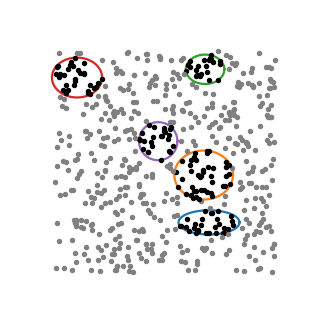

Ans: 147.42145423791618


In [53]:
a = [1.37939934593926816, 1.32613036797591510, 0.87285041938765207, 1.13378930771378772, 0.86869583078331103]
b = [0.54837775777762565, 1.10846552923064889, 0.66542019125351159, 0.90211344093212720, 0.86166543950961050]
wel = [0.75643192040609930, 1.46996980016725787, 0.58081229300463921, 1.02280657367373951, 0.74852517483206793]
X = [7.15794970241458195, 4.19161216864760267, 5.24167771009733485, 6.19602642023761785, 5.71578480689591739, 1.31157546613816400, 0.10503377420398752, 7.52681645161140533, 7.78597569020778391, 8.06354915325469790, 7.46314076742757404, 5.75313495774486405, 6.43500452934489964, 9.33201033455902085, 8.25446199143748238, 9.43215460971376807, 8.79797625495904612, 8.77538173975554514, 9.86058345591440677, 6.74711824539290461, 7.72541952312270475, 9.87625197176990888, 6.36311761121921293, 1.53852385598645336, 9.31345671848885992, 2.00480772688172859, 1.71309582100180990, 7.78010775679183375, 1.67113282192865364, 8.59766669351746415, 0.15781762398865418, 0.41793948200639308, 3.09680644591848520, 4.44904888164861401, 5.25231459482585894, 7.53133827208971152, 8.53908048641536155, 4.59021727531192525, 3.64448324514698641, 7.89698084756259711, 1.20236265054457503, 2.52840780272492260, 1.02525588208474905, 5.40239958804886200, 0.41528401163076878, 9.75121568258924931, 6.84037717111482646, 8.80968478576076031, 6.15335936794031291, 7.19924078508216070, 4.12234673925095496, 3.20016632621413244, 4.06433391894731511, 9.11240259409062325, 8.67281005757907053, 0.24117422616484085, 0.57074395926094645, 3.72316294509285584, 3.86603515744741699, 0.95046999107139429, 3.91836752359465379, 7.93714065368277133, 5.28388608507948376, 4.05668585100179691, 8.28971482653070524, 7.94776660421476322, 6.94229808896527523, 5.61696133392056041, 6.18752426594231331, 0.67404917527587815, 5.57088286356492102, 0.26510410161199593, 9.35195831461977534, 1.04550118942516090, 0.94852223979034589, 1.47708612494168112, 5.81318698833942715, 5.41684057903900484, 4.48488879183795408, 7.17338426917195271, 2.71172784434866809, 2.71497327870243410, 5.31732213296009881, 6.40396308634893074, 1.96693847302751412, 3.02134458808184103, 7.11378302545553076, 6.33664760996157206, 8.71605492189893027, 2.01285256374169030, 2.32932430136901791, 4.75535855650533801, 3.09938209399844933, 9.82085620476438947, 6.04626093647235940, 6.61127367184697778, 7.32626775370146532, 2.65868377158604119, 1.98194125328068904, 7.65031972571664021, 0.24881023801663682, 0.25741981673462977, 4.53906441698096774, 3.22955594770406051, 0.23426552491003227, 7.58724332904023235, 0.80465530223894910, 4.31630290062268163, 5.13841022354278731, 2.33880785771745758, 8.08930840139105989, 6.74104210383654223, 3.64188193309913455, 8.09396544997248846, 2.09030516605887007, 4.36947903332483989, 2.73284729525691938, 6.01073524281830096, 5.53131090710803619, 9.30652366694211963, 0.47700610268053500, 5.38749013724724080, 6.82306529790747351, 0.69384916766263238, 1.46606224616403158, 0.08694057491981710, 8.28922836017535225, 8.69442437912974775, 2.76119006876828443, 5.37592457434380577, 8.32732961276595063, 7.10057045458257985, 2.83261230177933365, 4.83135022326629482, 0.93815720404528902, 3.75047276619136305, 3.22604966944221605, 6.61241099462271897, 3.72527899633933846, 0.97611558489793193, 0.94433151376439706, 3.00755071630880089, 8.74127154650255100, 2.31471467264837560, 1.68045612857713356, 2.75790146789852031, 4.87918622927349777, 0.99323351245686808, 6.12258423748118119, 6.92853229028103179, 9.28424303331075684, 5.41683574810461366, 3.36106930085007027, 7.15176915620387810, 6.52207850504188436, 8.56233710305515494, 5.00974219592158043, 3.94933876175168308, 8.58877873980752327, 9.74668264908243032, 6.45998519283966388, 3.65582327912701643, 2.34488594639590175, 3.63179381652026478, 7.14409015966074001, 4.97218115791812565, 5.66218977616817476, 1.19975375405137918, 2.92533186799006195, 2.22264260344158604, 3.85129360840746759, 4.28407338308658492, 4.80444210471093225, 2.99230595648694919, 5.66236101412985349, 4.02856830001734778, 4.17090542071690162, 5.25797196613472817, 7.79291478379949254, 5.44761966163434685, 3.31363394343013873, 7.69179064488299957, 0.34701939914306590, 2.56078856582394376, 6.39395345278685490, 9.90813158762210300, 2.14921705549989550, 9.59643390190713141, 9.82432248024027821, 1.24329940958283425, 5.42060776477188888, 6.37819417560053381, 2.16341541772606671, 8.30963765313475555, 6.22178373658232964, 7.33123322993258686, 4.90928594428053255, 1.41645730337430109, 9.97938681072857037, 2.79138520335072915, 3.12641153402958416, 0.54889729044333424, 1.72186664858004379, 6.21561685366329808, 7.93523712713437490, 7.71030634628202449, 0.54234274996798892, 2.82703512339394969, 6.66931094596215246, 1.93480741067235229, 0.36307963828842715, 9.66791079347014559, 7.99086590884882497, 7.13595741622359014, 2.17594037729105150, 1.67290482119581418, 6.51641067437404864, 6.04690703671738028, 9.58638990346407027, 9.48293031535396835, 8.95819887110221202, 5.05819602492930365, 3.85364892838303552, 0.76169192715460077, 3.23815055598770885, 5.58722134112556557, 2.06211215957047056, 3.03351602922604657, 2.58833548891622378, 1.31963277818229030, 2.87827656552891309, 1.84699039707613810, 7.43494747957298152, 7.81080258858798171, 5.57414684170724595, 6.68685385517986042, 7.95266166445486178, 4.23267892168669846, 9.61021893727831511, 5.21741042925300569, 3.38963150704553406, 4.45896239242527237, 0.48327908635048766, 7.28958966547373421, 2.71645219400002880, 4.22503500090082884, 4.46844211442876293, 2.13130297384018563, 3.68382668621647280, 2.94718311508311537, 3.84482935671722448, 3.34380958775409720, 2.81254796507331228, 2.35768674028907776, 5.84454712460910653, 5.07611884140699221, 3.40374200666068383, 5.13583241805195456, 9.81492527722026509, 6.00670080672022877, 1.45582930456485071, 8.53335324540857165, 3.02704749120017214, 0.88229276434682036, 6.55151715709064675, 7.95105659079280347, 3.39086002704965050, 2.49019267925430388, 3.71232354062875558, 4.26474160841596728, 6.97263534291384879, 6.40115626749837929, 6.94911067682915640, 5.76537110058316316, 7.91998103355121152, 5.06943612351610806, 2.18831517953453902, 0.58010921298349616, 8.96854860157196043, 1.03756288336337987, 3.69003677693732346, 1.71091832391548793, 3.97730456415786104, 9.36116526769971102, 7.03765065372539311, 9.92222924446977217, 5.49869952488800173, 9.63718870393117299, 6.16852837115574815, 6.70822563893505119, 9.84281029519148198, 0.17999924268666367, 3.05496284897260217, 9.12614722274402368, 8.50706738207348501, 5.80935428596413583, 0.49982109774709294, 2.04750486959148681, 1.11921572089618726, 4.02962178957467643, 8.73380268696604922, 0.98192585379135222, 1.56545176719394719, 3.85764657870927508, 4.51465375507715549, 9.04266975709756515, 9.26650960533622126, 7.75953723066289847, 8.08428643800266400, 5.99905343689142789, 6.25379876603458307, 4.67484853337199979, 8.09595212121697294, 1.95426939228767749, 2.68479946948502946, 3.59175132699584321, 5.73730336210440672, 3.84866450981816488, 9.71950655450621781, 4.18984135169068495, 2.36282961323407559, 4.45606522833098495, 7.81106626136434379, 5.37334137183937433, 6.85720678963963870, 1.22543904073999954, 8.43993733348381525, 7.88584351643306203, 0.65965762929524274, 6.35634124035072023, 8.23879942090763429, 4.27752949983847408, 8.83752790072638206, 2.31031983507293148, 7.76638522966851408, 9.79603456309495968, 7.18702665177157840, 1.16273930891274135, 9.95886378346063594, 2.37800918818363094, 5.84699372712453513, 7.03959912392454079, 1.98387563540923795, 5.32223739920770988, 6.45991278396026125, 7.49821731103506384, 4.19105505694068192, 0.30227001359540484, 1.37594463646847909, 5.08665181308072967, 9.44188387629739267, 6.38109899790433666, 8.67907381429757585, 4.17723444961496515, 6.16471454484211900, 2.12291792244830280, 3.77382631259636092, 3.24080469539659299, 4.24519798949779670, 6.00095778097399268, 4.83618066942709213, 8.15063451666024186, 6.87614064661256386, 0.64342794557377125, 6.44323469221407308, 2.97927029148674549, 4.45582040937009261, 7.07619823034775219, 8.83748127971728437, 9.27346611905593932, 5.37371152270940211, 9.31854476119671205, 1.38756969481617531, 9.04071771488273868, 8.95022183418276462, 6.93860569060642884, 8.72221236109273335, 3.46301540169316358, 0.57950528973006010, 4.91177300550023865, 5.74086841776306223, 7.69897912697030051, 7.37100316445492343, 2.81813573537553630, 5.20975981120059828, 4.19442088388509760, 9.42222201437744999, 8.21875060063561946, 5.96182270160380146, 5.79879832794477679, 5.79226493583033353, 2.84952868011147054, 3.12941073683838145, 9.36927755772129345, 0.66918072212757806, 6.70003580700118384, 9.44439404866655252, 6.45847293479435436, 8.87999219584087385, 6.57496432952437715, 7.04225963600390781, 9.70832540099677210, 7.12370448476223661, 3.65701494795009108, 6.28741970623147495, 5.87149715376821213, 8.63232164721114792, 6.78968079412681025, 6.19342347084835865, 9.45806258580150683, 9.81298387482093837, 9.98617753671741326, 5.97990018844211679, 9.81676680955145642, 6.81627225689429395, 7.88318043217758024, 1.83823470412988410, 6.95919373615944714, 7.04935319994106724, 3.49908899704611365, 8.15708451870048457, 7.10877557775708802, 9.02369226282359804, 4.07211333547746612, 7.95938177341543618, 7.95952689065611363, 3.72919295543141072, 5.03521503169426143, 4.15996459581028599, 6.43399148643631769, 3.54186209801925500, 4.01401002210050617, 9.69846226583508120, 3.60099895769803613, 3.41669215959936379, 1.48842898626891595, 2.53087049663268671, 7.13072481175842121, 1.74791439870631504, 4.81048654628076999, 2.68344721725984225, 9.04463903271034830, 9.58239713083164979, 0.77995333650871301, 4.84270260290760568, 1.01532957897872200, 0.90574545171989929, 1.44653140936299884, 1.62575528900815947, 6.46240076313586620, 6.88671756562448145, 1.40936419021574388, 8.47618040502672443, 6.09941351694965128, 2.88378142124964265, 8.09754429683767718, 9.17253954049476938, 2.18180998190883102, 7.18031110825297425, 9.99193153584334048, 5.38274196337549427, 0.81651807666824894, 8.90708904493834908, 8.71219508464432835, 3.36076102503163909, 2.26343757541753954, 9.61289015438113559, 6.67684958716804466, 0.29380790285317482, 9.27779371868932579, 7.63930998867748290, 3.09515401128347722, 0.99908906961275301, 7.17549546714371544, 6.10779805129159215, 4.41781274718217798, 1.75252819248860825, 7.15821722360093116, 0.17131707528293738, 5.58122523268729598, 0.05147215872604693, 5.75055162209613702, 5.03227911794149563, 6.50226975727919232, 3.24002083285365750, 2.94012223837786557, 1.37968062262237789, 3.58778476437225047, 8.93948632507279939, 6.52199592467910882, 4.99642856186334505, 9.86998977080106776, 5.00932905283808694, 2.31599085350668776, 5.81321148361980899, 7.72870087187429888, 2.33754774352466921, 9.96879506080844813, 8.16211426227652304, 2.76780248299139942, 1.35455552531298706, 5.91257291631619442, 2.23740039144431879, 3.55599069651980759, 7.53413177068181028, 7.60084624333317116, 6.06021523106463089, 1.57520273880183970, 6.81987874663939309, 4.32834441362168310, 2.40145736901603257, 8.58014953301144701, 9.81828174183905489, 8.04324228228837157, 1.10392310786156078, 2.82934947042349094, 3.42118222031618346, 6.32233523286163290, 4.53728071909072384, 3.31021667784777929, 7.42965397408956818, 2.94352245993356387, 4.76938605763750889, 1.63576490334705227, 2.12666977834799820, 6.87418926810142406, 7.31627495926086890, 8.42904187153892437, 6.33868188611163497, 4.61360745909544345, 3.32271038036517696, 9.48856535277585955, 4.88121658717793583, 8.44601218439964008, 9.15593449241006674, 0.87804139860064523, 2.64447143394572759, 7.92050698457932789, 7.16944602792825325, 3.94693850191187767, 5.09849934380649206, 0.47035858734964964, 1.99399965337086260, 1.91969028854468760, 6.68068194964216211, 3.32375516151491279, 7.20653750845195695, 4.41716293417136452, 7.06394358963222402, 8.82876232228523250, 3.12955701766324790, 4.34755596987313986, 9.64482202827573865, 9.95641226070071639, 2.85798826056023891, 9.00147102077540140, 2.54545481684953412, 6.25230868327719325, 1.05643103805953542, 2.29141417789602730, 5.42206994304637835, 4.44182624356972955, 7.02879930319347324, 2.42738290089269615, 7.92106849281025038, 4.50106313631374455, 6.43472456326698339, 0.98098182093239061, 9.78693199144020909, 9.11632352210369845, 0.13133982899152796, 3.49109370621135007, 4.59938607690028167, 9.03263859912408940, 0.15118564054905526, 7.42902517522512973, 9.79134380679138872, 8.22784253818329603, 6.50061974851634883, 1.64743537518878269, 7.74129407237991618, 6.52537160685855966, 8.18372553205396436, 9.73069253189208716, 0.82376446657484781, 1.25224435682417923, 2.92955662527443206, 1.55567853775302134, 3.49026722747493334, 1.80606272783674138, 3.89360958992998940, 2.73178312765097520, 9.73199041857956892, 8.36565678899268228, 8.11765232256161973, 5.26393845852889442, 3.79529593639507556, 6.66188203845034987, 3.34965320780105769, 5.15612801222436801]
Y = [3.43779299618950596, 4.32618194411056578, 4.70281706394048182, 3.48195316011469247, 2.07997791468257276, 1.98505634806122711, 8.94258562193061302, 6.54387073639328598, 4.99584223748942069, 2.29037528863531126, 2.15828340576206834, 5.92750096271495241, 3.40277680720356246, 0.17574931493922086, 9.43687929595827057, 3.86987765695422148, 4.47262531350454395, 8.53838547146866311, 0.01768230353320299, 4.62559458926156797, 2.00036087586932787, 4.18520023856574142, 5.16845912765322524, 8.09635961512398339, 7.51212984636251768, 7.98435842576956567, 3.12550746384051248, 9.83318451728679754, 3.40387971017371704, 2.79767316985245618, 4.77903481840012745, 5.04774178633227422, 2.78893721973360709, 5.69669340435784211, 5.43829043309865945, 9.42110868391621992, 3.84173793529678731, 8.87314135712837171, 6.30375739839218685, 1.94613715052689207, 9.92076839309535785, 1.91798848036048519, 2.06779066957226254, 9.03612228674003326, 8.25974611569387740, 2.09472737647394824, 2.75831197275655438, 5.71013196862764083, 4.83155683044954731, 9.51046495240883516, 8.98930878970794112, 5.11267114469559480, 3.14705029749365206, 0.55438985950559849, 1.48661443819779304, 8.83964613031045943, 8.08049544820983279, 7.67848623746292613, 6.01376725861812478, 8.62425268934586953, 3.38914301223783854, 7.19384848669128640, 6.48880092754304982, 1.86004180587552748, 5.81210461925044619, 0.98501694620978686, 7.40454824789137334, 3.86544463743659339, 9.28825552278281741, 5.73980933446490571, 8.94629839733845245, 7.94334036602258742, 6.62781124481702211, 5.13032842091979102, 2.20639924323599690, 2.31194920832365014, 5.02306897444876910, 5.70318059349395590, 6.09606151336520696, 2.67293550139654057, 0.82458303020068069, 7.07367796040411534, 6.55583602447620173, 7.03005658422743096, 3.94791596964700231, 1.30655237507637412, 3.55752892915794705, 2.00190126313440908, 2.38761436873456656, 0.54868051031794152, 7.18180489759800178, 9.77787199883088576, 9.00925629897227154, 7.01011925415397386, 2.41219442475458035, 8.88152601020572163, 1.78285893718047816, 1.98724744036857803, 3.61903557105265117, 3.87712894160432864, 9.90836799601316365, 6.31288408129753975, 6.58201773986442529, 4.31520533440649423, 1.40270453714129717, 7.09642813560698293, 3.73443125565087719, 6.64971880905662616, 4.81653121201648382, 4.63384607011438820, 4.73111043530464670, 4.54348140546770196, 7.30340817634163386, 2.12090185488322369, 0.05792122715772119, 2.68033996286537901, 7.29346567219546849, 5.46070600131382022, 4.51288292252836776, 7.96699193693735097, 0.17359787060357790, 4.58140195231101011, 7.04389505733683485, 6.15612975329868206, 7.59330558998869609, 0.20687602921820480, 7.01113084354184224, 5.90366643793828416, 0.09722581217495585, 7.38329420977288819, 8.58167874865955227, 2.66502614852464292, 4.30994536243579240, 9.74163006445305157, 2.35877485575930912, 9.67423052050044596, 5.05342568660997671, 4.32264948309041941, 4.74537986219007557, 9.70183676848923859, 5.07321312028740312, 8.31824566071831661, 1.68432309789062318, 8.40731833170659293, 2.14765895279677377, 6.51734387910672286, 0.79014931572906288, 2.36372966846672661, 1.85353695850921096, 5.49309227032324543, 9.89962407293287505, 7.52793226446944796, 1.12094397638409449, 6.15906109559256976, 6.79284631262879213, 8.99518841349062725, 0.88540561357150049, 3.53952660577841582, 0.06689657936067572, 3.49922608696333981, 1.78374665075246686, 1.90831153132484332, 4.56800328116794319, 8.93460038487227948, 7.66549010827498201, 3.19869273601981696, 8.03824323673401331, 9.01722603628103236, 6.02218298926596152, 6.08032945241796074, 1.85485342751670834, 2.79285992061657140, 2.37299277146909349, 9.11781345326232362, 8.76907491363613723, 5.55255913495245856, 9.85070680270518118, 4.89137003311435237, 4.36656516047485699, 8.42319001378211851, 9.91661653336504045, 3.07691356685435791, 5.96118316016700955, 5.14627145730941393, 2.19542741543256703, 8.60122878503203836, 6.92694060244300402, 3.00121728151099498, 9.24082633553018162, 2.36171189267806003, 6.79905576430263991, 5.75669893523218690, 0.98592772257791172, 8.43462948914789834, 5.09091432608914740, 5.90087715560873161, 6.13838149791174459, 6.40581386741987391, 5.87877898671956167, 2.71218473689998607, 7.18050931554226057, 4.98115288710968862, 7.48706314006201978, 4.58269454464079296, 9.20881045449832669, 7.48293882375930153, 8.20221727487202656, 3.32014154404317718, 3.20704009895843578, 7.61986952169525278, 7.50867618554109217, 5.99507161984701398, 3.97143941931577871, 4.34038899014915813, 4.31465166570350522, 5.38687699848115908, 4.38128239003819786, 0.98127451068369953, 3.83640164159828601, 3.23421045075245717, 8.45731567003530671, 6.32064364555517599, 4.93468130952341522, 9.38543955448596279, 3.84040580901328754, 2.57130535118665371, 6.38515701263873758, 4.36737019525272885, 0.50960654077042977, 7.15656385706055431, 2.62184855919155879, 5.06981828705811921, 8.68074309542796563, 4.73428186949731789, 3.14314220346706108, 3.70708047425235687, 7.26457501698128993, 9.60897509655022830, 9.25614377479922723, 6.18472584174459605, 6.03549791784627754, 1.24896874177968575, 8.93597923234042391, 2.02737551229271951, 5.94690873645932250, 1.06723666972265874, 0.88495966963520245, 5.75475596185722171, 5.50004141212943853, 1.06870877246410090, 0.86833441833686242, 9.93953886709457812, 0.09791869772908912, 1.24347901548509276, 9.70813940181038504, 1.34541400527824373, 8.52104795410726545, 1.91490180189715531, 4.86193169285310223, 7.67209228452992420, 1.15713857155503863, 5.95804175342770304, 7.39079715959518069, 9.32817058506119778, 1.84702016328643581, 6.05733395506375238, 0.03481555981739715, 6.90056495044994378, 1.43237688734406343, 5.45471612400720218, 4.74933527088909546, 5.36855153362035153, 3.62616497784970715, 2.07142668798614871, 4.45812211838411887, 8.26793290183816332, 8.75039006136486996, 8.48052879431816109, 9.23225579814429054, 9.89879932344346791, 6.04450852361321811, 0.08788631643691147, 1.93056020479398849, 3.33959524797521556, 8.68800076008169242, 5.11722899515492813, 1.93210910064019803, 8.01859046413440169, 7.18976505005250388, 1.10979559740695288, 7.55710182292089439, 9.32451753570905062, 2.23300169426815831, 3.35177908468761832, 2.01179346698394568, 7.34629336115246190, 3.52091271024451125, 1.73814694395476477, 5.33583971656485101, 3.54346196878678654, 5.82370728930784942, 8.75402710053007027, 0.52931452853851813, 3.98430509529328125, 3.09235863902630559, 1.13731275179454361, 0.15404935031737121, 6.88029987158305190, 9.45466765186755254, 3.55596700188288839, 8.50428774937898702, 7.73238971304449052, 7.71212907807895309, 4.47249185115021142, 9.50183760717432691, 7.70535971265705033, 1.19916236024901313, 3.91478784113153377, 9.27658344999020557, 3.10394399824182798, 7.79466689131114610, 4.31783835922797188, 0.84052341579767709, 3.32805840604885717, 8.10564466117983073, 4.55653273545759685, 6.09986277997043391, 6.04952817674136156, 9.19845680000286947, 5.21439733212180023, 6.60032898802455748, 5.44752837758420760, 2.22641860376339906, 7.96030764201759311, 3.91033104760954764, 8.31868244757446185, 8.04709705125309327, 4.43990327863438505, 0.72673851836040249, 4.98482581915318868, 7.26582053691776775, 9.60568702359787174, 8.55792526267736520, 9.58288843123705192, 9.15932683295384642, 6.52922706462763180, 1.28034863789140085, 8.95657902636649617, 9.02051814973911092, 8.50280337708845302, 7.65350243369716932, 0.08512280953744344, 5.81928898314570731, 1.26902594805786917, 9.57002070123219006, 2.94765537795047106, 1.46112599850960367, 6.38737966636871946, 9.86667482957891195, 2.02996806315496547, 5.07212066598825295, 7.11629374741037246, 9.31200141571471107, 8.21720575654899044, 8.88860823396083788, 3.77269083867752730, 8.68592120699429771, 9.67356744183277506, 0.74868654083594444, 2.12675587775633224, 8.73157703275784236, 1.82963235432118010, 8.97318527495275475, 1.73805901035876453, 4.59132534302609230, 9.03971478896405145, 3.25993900844937068, 0.27146467208583713, 7.43510837238941402, 1.64175867162552946, 9.58396107632153260, 1.77009371390258963, 2.40544187002658560, 9.21103388765799735, 5.48735990619846792, 6.82609624816536531, 4.59506130370732713, 9.37520944418037772, 0.44981004540067482, 0.89876812315689114, 7.31691438095879132, 0.29521888356847770, 0.28797986376927986, 2.26663378665148185, 4.61020437435734731, 2.38676197275068169, 2.68726078720458528, 3.66378369056714526, 6.37406628025168587, 3.31207594948682793, 1.77264468434436773, 7.37906952773719027, 1.47141144500815280, 8.90580051066701195, 5.94088345745258195, 6.48490849477739317, 1.28611488105073724, 3.70048689711885981, 6.56597184913401222, 0.91600285044801999, 8.66341410062244677, 1.26650210937637286, 9.12007018467659591, 1.87954369286397305, 9.61098830288693406, 1.73289155305035525, 3.33807270547321533, 5.38707235787111660, 6.57494299365310209, 3.17375955988076797, 7.39897495992354237, 9.79888434134608488, 4.76679155395221432, 5.94045946431134642, 9.73914825325840283, 7.09087980242611682, 4.67986236480590367, 7.36269624552174573, 0.50811638147991056, 8.39169253301786888, 2.50108046944659490, 6.27526389168495768, 7.02997910677438131, 8.08442837323788943, 4.77386300089273519, 6.06193516479956607, 7.52568088905551669, 9.64966389081346065, 2.15896502418760905, 9.62770229870121597, 7.18856133988110280, 2.88752747455328418, 4.67585576833145744, 9.49361020686118273, 6.17799202284217763, 2.23530005830858336, 8.46821848728587767, 6.38167503658012780, 8.03998531831592267, 0.52117349896550813, 1.78676442563063920, 3.13206846164292285, 8.52410359138265150, 9.36697268615698952, 7.25400329217220197, 5.38979889747862551, 3.84588037508040603, 9.57459008178501136, 6.72011775525792210, 9.61641183759778784, 7.21417849665399658, 0.07350584260626847, 9.04035505963556218, 5.02018890237417637, 0.55940662927708495, 3.72595439311705334, 2.04630571125437477, 8.98145881967458770, 3.47080223429258483, 8.56902516929977409, 1.77966057451881765, 4.85362151024493649, 0.43656179560144448, 0.84417165364109925, 7.71587925002879782, 5.88700016408224869, 1.90502125839572378, 7.46678478250660405, 5.65979693375619686, 3.38804903368723265, 4.05662360892476137, 0.49213601274421315, 7.99242403174806437, 8.93853766607362843, 3.47157199988852527, 3.43684211293846609, 9.45400662388992785, 0.00205208839646698, 4.01521547963782766, 1.89242767683645785, 6.50608842695327105, 1.08076617410505338, 6.40528367497076889, 7.92250778067502193, 4.19894038800092684, 5.61793141097924220, 3.11991164477352889, 8.39360012656407761, 7.69125511563993847, 1.50839521372547081, 0.83760328279994356, 8.96490140727037499, 0.68493206818350250, 4.67002657019459910, 9.53701410625100898, 1.57070958961007867, 0.09864361848855641, 3.69020099579246974, 1.00191117010077990, 8.36777786712113603, 7.74224334436693162, 5.53979435043519519, 7.02597564431008070, 2.54084965357526027, 9.13426293028692626, 8.99377259845953070, 4.53765502098305706, 3.35416702397488908, 2.51533076001893985, 6.44180500049596816, 2.77181639411289016, 1.63909439619779218, 0.56924613194845097, 6.25232903285003605, 3.56902722909709791, 1.10916612946616810, 6.80593544831051478, 4.08717181631583415, 3.64935894581805309, 8.75923199714982026, 3.85849569134801484, 2.40705771508368915, 0.55781485636293593, 3.73852788820704829, 1.86286791579279631, 3.73655722125028955, 0.81503464652337043, 6.86474301032712209, 4.07246074666425262, 0.63981248475870056, 3.59338842547843651, 7.84515597288289257, 1.12721581389299552, 8.36681855329929292, 4.33617581144968423, 0.71771329990877653, 4.71410617826129297, 1.05210635871406111, 2.91912648209740855, 4.04252972681727218, 8.22523112577483317, 8.54978592636755685, 7.08980388110779991, 1.27301377895421286, 0.28256624402802966, 8.43818447650595616, 3.15857134644188964, 3.84641297824355544, 4.24195772529144666, 5.68538914185456257, 2.52795470844440873, 4.44469610812887961, 5.46821419802965636, 6.09430125053403238, 4.82852657617856273, 7.74990972879819218, 5.07110870839361905, 0.87536105558109423, 6.22053834385306814, 5.52957200238869628, 9.27096492666182925, 6.45794012693381170, 8.48196451641895877, 8.37927543870284097, 2.24132156245313485, 9.99595970676901757, 8.74471692126035194, 0.08934201309425460, 0.38258695494651773, 8.47194494646622509, 3.44149923594914586, 9.33793169827097636, 5.86206579516968507, 8.33542322636373889, 1.44894973959483586, 2.04379575970518168, 2.16344011305607342, 8.18318034053887011, 6.98109585155061385, 8.34572038836943797, 5.98747199827838728, 1.04136256282167161, 5.85178274647303542, 8.35519947536077012, 7.29933908775218221, 6.77360938339846097, 7.21143045769649493, 2.13806417464290854, 8.28071322434952961, 6.02302698127307501]
wpnt = [1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000, 1.00000000000000000]


used=[1, 1, 1, 1, 1]

sol=[(7.02786943397117891, 2.24919364511285513, 0.00000000000000000), (6.78443788898326616, 4.39118972831335963, 0.00000000000000000), (6.84982461062788595, 9.17450963657891982, 0.00000000000000000), (1.05638188230134933, 8.80198681499516411, 0.00000000000000000), (4.72970562254934102, 5.92121763973263793, 0.00000000000000000)]
fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt, psize=15, lwell=2) 
fig.savefig('MCE_TA37.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


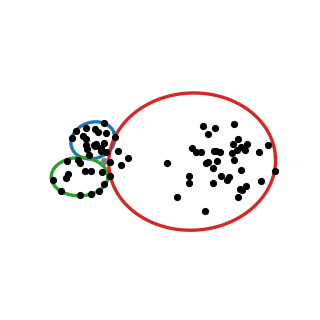

Ans: 136.78681589455755


In [61]:
### plot solution of TA045
a = [1.063084045299136, 1.144750034519305, 1.342886281706786, 3.954646097924316, 3.793834638403184, 3.970650332026777]
b = [0.855657817421206, 0.713775177699024, 0.908160356587384, 3.250972982416984, 3.205012008780344, 3.660934557508996]
wel = [0.909636173935965, 0.817094159309981, 1.219556084451141, 12.856447619372704, 12.159285575409038, 14.536291016301394]
X = [-2.555789713551590, -3.294777577528602, -3.217787952215633, -3.428077119567037, -2.828125811421252, -1.764982330198367, -2.883858515608063, -3.443921420873472, -2.492189006076504, -2.585296857356184, -2.059073765487211, -4.325775895866939, -4.383430742941630, -3.556304539774363, -2.578225727081953, -2.967688641851964, -4.627104658030268, -3.787515252890942, -3.699526171272907, -2.705559826999751, -3.370820437543624, -2.655666516382757, -3.918268207976368, -2.718900168970981, -2.289729624861272, -3.439276958622009, -3.006878350876766, -3.196879648885169, -4.995970457489130, -2.988163492353158, -4.269769921167667, -1.916502321825474, -2.277696590089780, -1.417521547799280, -3.062685602208392, -3.494267013668276, -4.077402489149026, -3.730974778380844, -2.500839470188986, -2.583034371391115, 2.033871533172733, 0.873982930255508, 3.602278372033772, 2.346490244469028, 3.709144758754231, 2.780187115311789, 2.627952478893949, 1.578533703031887, 1.764266899108788, 3.257044880930065, 4.850041733859069, 4.124743391021934, 3.885218667503496, 4.751610947534592, 3.903522790506955, 0.393716722578799, 2.965011355686454, 3.920656398696985, 3.947568813050314, 2.221886076075922, 3.559269583569296, 4.159230597319013, 1.467499594760354, 2.597741264652597, 2.097056586186226, 4.192853800191088, 2.672945861466143, 2.250983778110506, 2.368635549725383, 3.357744252431635, 3.537350228265321, 2.746277412025847, 5.192425561716730, 3.494015299834293, 2.605917443043021, 2.939536162032061, 3.793711510239014, 5.506995047781523, 1.427542357155707, 3.766310822371354]
Y = [-1.324548822324304, -2.808843403443912, -4.662182447709953, -1.543355583405845, -4.513616221612271, -3.303126135825585, -1.731508480203620, -2.045163651158439, -1.768746169904071, -3.108797179743109, -1.962274822047257, -3.099510580723152, -3.927846775987800, -1.942876913593050, -2.248040100100758, -2.293218846050460, -4.531992769709444, -3.059404557318445, -3.221082968059224, -2.480375645963011, -2.541000379952624, -3.636082916447877, -1.674332347056020, -2.645331570752634, -3.145867478633170, -2.346929936904211, -1.599896796242808, -3.595930325839209, -4.022233603155549, -2.418275613536340, -3.705360570526812, -2.643621444981367, -3.835280362331930, -2.981678297924609, -2.343881417343098, -3.567123323186214, -2.014685151942373, -4.719123073858231, -2.688416621112358, -4.215103600794413, -2.675323095992034, -4.814628773632439, -3.037889798134296, -1.845925316539109, -2.598276576582226, -3.098251830442606, -2.635167074250579, -2.483755403444271, -2.695042520439464, -3.999563289678648, -4.046890560899645, -2.591423709627896, -4.434218341872981, -2.690120849275803, -2.457938798696873, -3.208194166512971, -3.834797589492336, -3.529388990555589, -4.462979039344084, -5.494933738352662, -1.370793877181931, -4.307960764697440, -4.159500029890748, -3.427788226258047, -1.469342122421025, -2.303174656941141, -1.537296527464817, -3.190539237093502, -3.171236238166743, -3.877813363852250, -2.320128191505046, -2.629748411780381, -2.356349285426203, -2.722730990064514, -4.160969381635157, -2.696732957458044, -2.042688759320523, -3.557527773189121, -3.795816001097489, -4.827326027951977]
wpnt = [3.004459427361454, 0.123434664620538, 2.810282081605330, 2.305062976691737, 2.320574803027409, 1.617154098942806, 1.622559580192092, 1.108778680979406, 1.773857999675463, 0.183815522838712, 1.962215723751469, 1.767584081737644, 2.774780260226983, 1.426983960788122, 0.743337228352025, 0.500583623443614, 4.994471414625809, 0.623709174966085, 0.538214543061608, 0.356704484784775, 0.348188448103681, 0.523167024536823, 2.600611227842130, 0.204806809709337, 0.525761327122508, 0.619464753688139, 1.960336292881938, 0.393894549399973, 5.028859606589744, 0.338543364719795, 2.109849187156053, 1.300972893086758, 1.219415499665292, 2.504573736446527, 0.434421079231931, 0.565928744502331, 2.131641473427344, 3.489708269700698, 0.346245436520252, 1.650337096104752, 1.038819306410204, 7.812826166939727, 0.364174874222309, 1.758963375579506, 0.664267997791093, 0.057971126460275, 0.271522421672039, 2.287074916889228, 1.620035360978125, 1.065198840885552, 4.518634263521043, 1.431982280701750, 2.840594341461548, 3.164165999576579, 1.110183778923664, 6.836057333135426, 0.698111220653114, 1.127860907783168, 3.038194325025721, 6.830155637374916, 2.967095057733659, 3.054576939748507, 3.692997811376325, 0.344814856688298, 3.158220346744244, 1.908465747359416, 2.246465858098607, 0.597330501525786, 0.427942918332067, 0.898537251905472, 0.750970943802993, 0.201461390227452, 5.221016086040279, 0.320929220340971, 1.503150966792069, 0.095626774793958, 1.546422773017176, 6.595861387478303, 3.105946146142227, 3.926352688914210]

n = len(X)
m = len(a)
k=1

used=[1, 0, 1, 1, 0, 0]

sol=[(-3.101406789217276, -2.127255612559518, 0.322680237006609), (-3.734502876965585, -3.848536258398062, 0.010214633150801), (1.598835657656949, -3.134327462248487, 0.051380090716951)]

fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt)
fig.savefig('MCER_TA45.pdf', bbox_inches="tight")

<IPython.core.display.Javascript object>


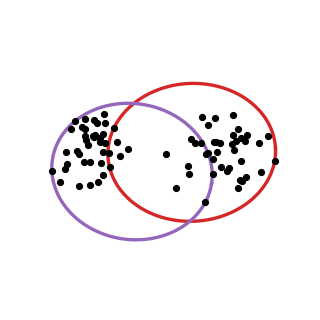

Ans: 126.94053810037434


In [62]:
### plot solution of TA44
a = [1.063084045299136, 1.144750034519305, 1.342886281706786, 3.954646097924316, 3.793834638403184, 3.970650332026777]
b = [0.855657817421206, 0.713775177699024, 0.908160356587384, 3.250972982416984, 3.205012008780344, 3.660934557508996]
wel = [0.909636173935965, 0.817094159309981, 1.219556084451141, 12.856447619372704, 12.159285575409038, 14.536291016301394]
X = [-2.555789713551590, -3.294777577528602, -3.217787952215633, -3.428077119567037, -2.828125811421252, -1.764982330198367, -2.883858515608063, -3.443921420873472, -2.492189006076504, -2.585296857356184, -2.059073765487211, -4.325775895866939, -4.383430742941630, -3.556304539774363, -2.578225727081953, -2.967688641851964, -4.627104658030268, -3.787515252890942, -3.699526171272907, -2.705559826999751, -3.370820437543624, -2.655666516382757, -3.918268207976368, -2.718900168970981, -2.289729624861272, -3.439276958622009, -3.006878350876766, -3.196879648885169, -4.995970457489130, -2.988163492353158, -4.269769921167667, -1.916502321825474, -2.277696590089780, -1.417521547799280, -3.062685602208392, -3.494267013668276, -4.077402489149026, -3.730974778380844, -2.500839470188986, -2.583034371391115, 2.033871533172733, 0.873982930255508, 3.602278372033772, 2.346490244469028, 3.709144758754231, 2.780187115311789, 2.627952478893949, 1.578533703031887, 1.764266899108788, 3.257044880930065, 4.850041733859069, 4.124743391021934, 3.885218667503496, 4.751610947534592, 3.903522790506955, 0.393716722578799, 2.965011355686454, 3.920656398696985, 3.947568813050314, 2.221886076075922, 3.559269583569296, 4.159230597319013, 1.467499594760354, 2.597741264652597, 2.097056586186226, 4.192853800191088, 2.672945861466143, 2.250983778110506, 2.368635549725383, 3.357744252431635, 3.537350228265321, 2.746277412025847, 5.192425561716730, 3.494015299834293, 2.605917443043021, 2.939536162032061, 3.793711510239014, 5.506995047781523, 1.427542357155707, 3.766310822371354]
Y = [-1.324548822324304, -2.808843403443912, -4.662182447709953, -1.543355583405845, -4.513616221612271, -3.303126135825585, -1.731508480203620, -2.045163651158439, -1.768746169904071, -3.108797179743109, -1.962274822047257, -3.099510580723152, -3.927846775987800, -1.942876913593050, -2.248040100100758, -2.293218846050460, -4.531992769709444, -3.059404557318445, -3.221082968059224, -2.480375645963011, -2.541000379952624, -3.636082916447877, -1.674332347056020, -2.645331570752634, -3.145867478633170, -2.346929936904211, -1.599896796242808, -3.595930325839209, -4.022233603155549, -2.418275613536340, -3.705360570526812, -2.643621444981367, -3.835280362331930, -2.981678297924609, -2.343881417343098, -3.567123323186214, -2.014685151942373, -4.719123073858231, -2.688416621112358, -4.215103600794413, -2.675323095992034, -4.814628773632439, -3.037889798134296, -1.845925316539109, -2.598276576582226, -3.098251830442606, -2.635167074250579, -2.483755403444271, -2.695042520439464, -3.999563289678648, -4.046890560899645, -2.591423709627896, -4.434218341872981, -2.690120849275803, -2.457938798696873, -3.208194166512971, -3.834797589492336, -3.529388990555589, -4.462979039344084, -5.494933738352662, -1.370793877181931, -4.307960764697440, -4.159500029890748, -3.427788226258047, -1.469342122421025, -2.303174656941141, -1.537296527464817, -3.190539237093502, -3.171236238166743, -3.877813363852250, -2.320128191505046, -2.629748411780381, -2.356349285426203, -2.722730990064514, -4.160969381635157, -2.696732957458044, -2.042688759320523, -3.557527773189121, -3.795816001097489, -4.827326027951977]
wpnt = [3.004459427361454, 0.123434664620538, 2.810282081605330, 2.305062976691737, 2.320574803027409, 1.617154098942806, 1.622559580192092, 1.108778680979406, 1.773857999675463, 0.183815522838712, 1.962215723751469, 1.767584081737644, 2.774780260226983, 1.426983960788122, 0.743337228352025, 0.500583623443614, 4.994471414625809, 0.623709174966085, 0.538214543061608, 0.356704484784775, 0.348188448103681, 0.523167024536823, 2.600611227842130, 0.204806809709337, 0.525761327122508, 0.619464753688139, 1.960336292881938, 0.393894549399973, 5.028859606589744, 0.338543364719795, 2.109849187156053, 1.300972893086758, 1.219415499665292, 2.504573736446527, 0.434421079231931, 0.565928744502331, 2.131641473427344, 3.489708269700698, 0.346245436520252, 1.650337096104752, 1.038819306410204, 7.812826166939727, 0.364174874222309, 1.758963375579506, 0.664267997791093, 0.057971126460275, 0.271522421672039, 2.287074916889228, 1.620035360978125, 1.065198840885552, 4.518634263521043, 1.431982280701750, 2.840594341461548, 3.164165999576579, 1.110183778923664, 6.836057333135426, 0.698111220653114, 1.127860907783168, 3.038194325025721, 6.830155637374916, 2.967095057733659, 3.054576939748507, 3.692997811376325, 0.344814856688298, 3.158220346744244, 1.908465747359416, 2.246465858098607, 0.597330501525786, 0.427942918332067, 0.898537251905472, 0.750970943802993, 0.201461390227452, 5.221016086040279, 0.320929220340971, 1.503150966792069, 0.095626774793958, 1.546422773017176, 6.595861387478303, 3.105946146142227, 3.926352688914210]

n = len(X)
m = len(a)
k=1

used=[0, 0, 0, 1, 1, 0]

sol=[(1.598835657656949, -3.134327462248487, 0.051380090716951), (-1.217847404029557, -4.039509577890231, -0.149024610638601)]

fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt)
fig.savefig('MCER_TA44.pdf', bbox_inches="tight")

In [ ]:
### plot solution of TA44
a = [5.00000000000000000, 3.00000000000000000, 1.00000000000000000]
b = [3.00000000000000000, 2.00000000000000000, 1.00000000000000000]
wel = [0] * 3
X = [42.00999999999999801, 39.14999999999999858, 45.57999999999999829, 16.76000000000000156, 13.89000000000000057, 23.87000000000000099, 18.23999999999999844, 47.60999999999999943, 31.78999999999999915, 7.08000000000000007]
Y = [19.71999999999999886, 39.92000000000000171, 9.88000000000000078, 38.40999999999999659, 27.69999999999999929, 31.44000000000000128, 25.67000000000000171, 45.81000000000000227, 35.85999999999999943, 30.35000000000000142]

wpnt = [0] * len(X)

n = len(X)
m = len(a)
k=1

used=[0, 0, 0, 1, 1, 0]

sol=[(1.598835657656949, -3.134327462248487, 0.051380090716951), (-1.217847404029557, -4.039509577890231, -0.149024610638601)]

fig, ax = plot_all(X, Y, a, b, sol, used, wel, wpnt)
fig.savefig('MCER_TA44.pdf', bbox_inches="tight")